Importing all the necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from numpy import random
from numpy.linalg import inv
import os
os.getcwd
import scipy
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend
from pylab import plot, show, title,xlabel,ylabel
from scipy.stats import expon
from scipy.stats import norm,t
from statsmodels.stats.proportion import proportions_ztest
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split

Step 2. Reading dataset from local


In [ ]:
applicants=pd.read_csv('credit_risk_applicants.csv')


created the applicants dataframe and will similarly create for other csvs

Determining the shape of the dataset


In [ ]:
applicants.shape

(307511, 122)


Cleaning the missing data
listing the null values columns having more than 40%

In [ ]:
emptycol=applicants.isnull().sum()
emptycol=emptycol[emptycol.values>(0.4*len(emptycol))]
len(emptycol)

64

So,There are 64 columns having null values greater than 40% in the dataset

Now, removing those 64 columns

In [ ]:
emptycol=list(emptycol[emptycol.values>=0.4].index)
applicants.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


Checking the columns having less null percentage

In [ ]:
applicants.isnull().sum()/len(applicants)*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902



So, 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing banks with median value

In [ ]:
#filling missing values with median
values = applicants['AMT_ANNUITY'].median()
applicants.loc[applicants['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [ ]:
#searching the columns for the null values
applicants.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


Now, all columns have been with zero null values

In [ ]:
#Removing rows having null values greater than or equal to 40%
emptyrow=applicants.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.4*len(applicants)].index)
applicants.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [ ]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

applicants.drop(labels=unwanted,axis=1,inplace=True)


There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [ ]:
#Let's find these categorical columns having these 'XNA' values
#for Gender column
applicants[applicants['CODE_GENDER']=='XNA'].shape

(4, 28)

In [ ]:
#for Organization column
applicants[applicants['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

so, there are 4 rows from Gender column and 45849 rows from Organization type column

In [ ]:
#Describing the Gender column to check the number of females and males.
applicants['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [ ]:
#Updating the column 'CODE_GENDER' with "F" for the dataset

applicants.loc[applicants['CODE_GENDER']=='XNA','CODE_GENDER']='F'
applicants['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202452
M,105059


In [ ]:
#Describing the organization type column
applicants['ORGANIZATION_TYPE'].describe()

,ORGANIZATION_TYPE
count,307511
unique,58
top,Business Entity Type 3
freq,67992


Here, column 'ORGANIZATION_TYPE', we have total count of 254335, out of which 45849 rows are having 'XNA' values.
Which means 18% of the column is having this values.Hence if we drop the rows of total 45849, will not have major impact on our dataset.

In [ ]:
#Hence, dropping the rows of total 45849 having 'XNA' values

applicants=applicants.drop(applicants.loc[applicants['ORGANIZATION_TYPE']=='XNA'].index)
applicants[applicants['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [ ]:
#Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

applicants[numeric_columns]=applicants[numeric_columns].apply(pd.to_numeric)

In [ ]:
applicants.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [ ]:
missing_applicants = applicants.isnull().sum().sort_values(ascending=False)

In [ ]:
missing_percent_app = (applicants.isnull().mean() * 100).sort_values(ascending=False)

In [ ]:
missing_percent_app

,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0


In [ ]:
emptycol_app = missing_percent_app[missing_percent_app > 40].index

In [ ]:
applicants.drop(columns=emptycol_app, inplace=True)

In [ ]:
#for numeric columns
num_cols_app = applicants.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
for col in num_cols_app:
    if applicants[col].isnull().sum() > 0:
        applicants[col].fillna(applicants[col].median(), inplace=True)


In [ ]:
cat_cols_app = applicants.select_dtypes(include=["object"]).columns

In [ ]:
for col in cat_cols_app:
    if applicants[col].isnull().sum() > 0:
        applicants[col].fillna(applicants[col].mode()[0], inplace=True)

**Derived Metrics**

Now,Creating bins for continous variable categories column
'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [ ]:
#Creating bins for income amount

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000,
        225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000,
        425000, 450000, 475000, 500000, 10000000000]

slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000',
        '100000-125000', '125000-150000', '150000-175000', '175000-200000',
        '200000-225000', '225000-250000', '250000-275000', '275000-300000',
        '300000-325000', '325000-350000', '350000-375000', '375000-400000',
        '400000-425000', '425000-450000', '450000-475000', '475000-500000',
        '500000 and above']

applicants['AMT_INCOME_RANGE'] = pd.cut(applicants['AMT_INCOME_TOTAL'],bins=bins,labels=slot)


In [ ]:
#Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

applicants['AMT_CREDIT_RANGE']=pd.cut(applicants['AMT_CREDIT'],bins=bins,labels=slots)

In [ ]:
#Dividing the dataset into two dataset of target1(client with payment difficulties)
#Target0(All others)

target0=applicants.loc[applicants['TARGET']==0]
target1=applicants.loc[applicants['TARGET']==1]

one of the purpose of creating target was to check the imbalance ratio.

In [ ]:
#calculation Imbalance Percentage
#since the majority is target0 and minority is target1

round(len(target0)/len(target1),2)

10.55

The Imbalance ratio is 10.55

**Univariate analysis for categories**

**Now,doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

# Create age and employment length (in years) for analysis

In [ ]:
applicants["AGE_YEARS"] = (-applicants["DAYS_BIRTH"] / 365).round(1)
target0["AGE_YEARS"] = (-target0["DAYS_BIRTH"] / 365).round(1)
target1["AGE_YEARS"] = (-target1["DAYS_BIRTH"] / 365).round(1)

In [ ]:
applicants["EMPLOYMENT_YEARS"] = (-applicants["DAYS_EMPLOYED"] / 365).round(1)
target0["EMPLOYMENT_YEARS"] = (-target0["DAYS_EMPLOYED"] / 365).round(1)
target1["EMPLOYMENT_YEARS"] = (-target1["DAYS_EMPLOYED"] / 365).round(1)

In [ ]:
# Function to plot a bar chart for any column (with optional hue) — avoids rewriting plotting code each time

def uniplot(df, col, title, hue=None):
    if hue is None:
        counts = df[col].value_counts()
        width = len(counts) + 7
        plt.figure(figsize=(width, 8))
        plt.bar(counts.index, counts.values, color='orange', edgecolor='black')

    else:
        categories = df[col].unique()
        hues = df[hue].unique()
        bar_width = 0.35
        x = range(len(categories))
        plt.figure(figsize=(len(categories)*1.5, 8))
        for i, h in enumerate(hues):
            subset = df[df[hue] == h][col].value_counts()
            plt.bar(
                [pos + i*bar_width for pos in range(len(categories))],
                subset.reindex(categories, fill_value=0).values,
                width=bar_width,
                label=str(h)
            )

        plt.xticks([pos + bar_width/2 for pos in range(len(categories))], categories, rotation=45)
        plt.legend()

    plt.yscale('log')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count (log scale)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


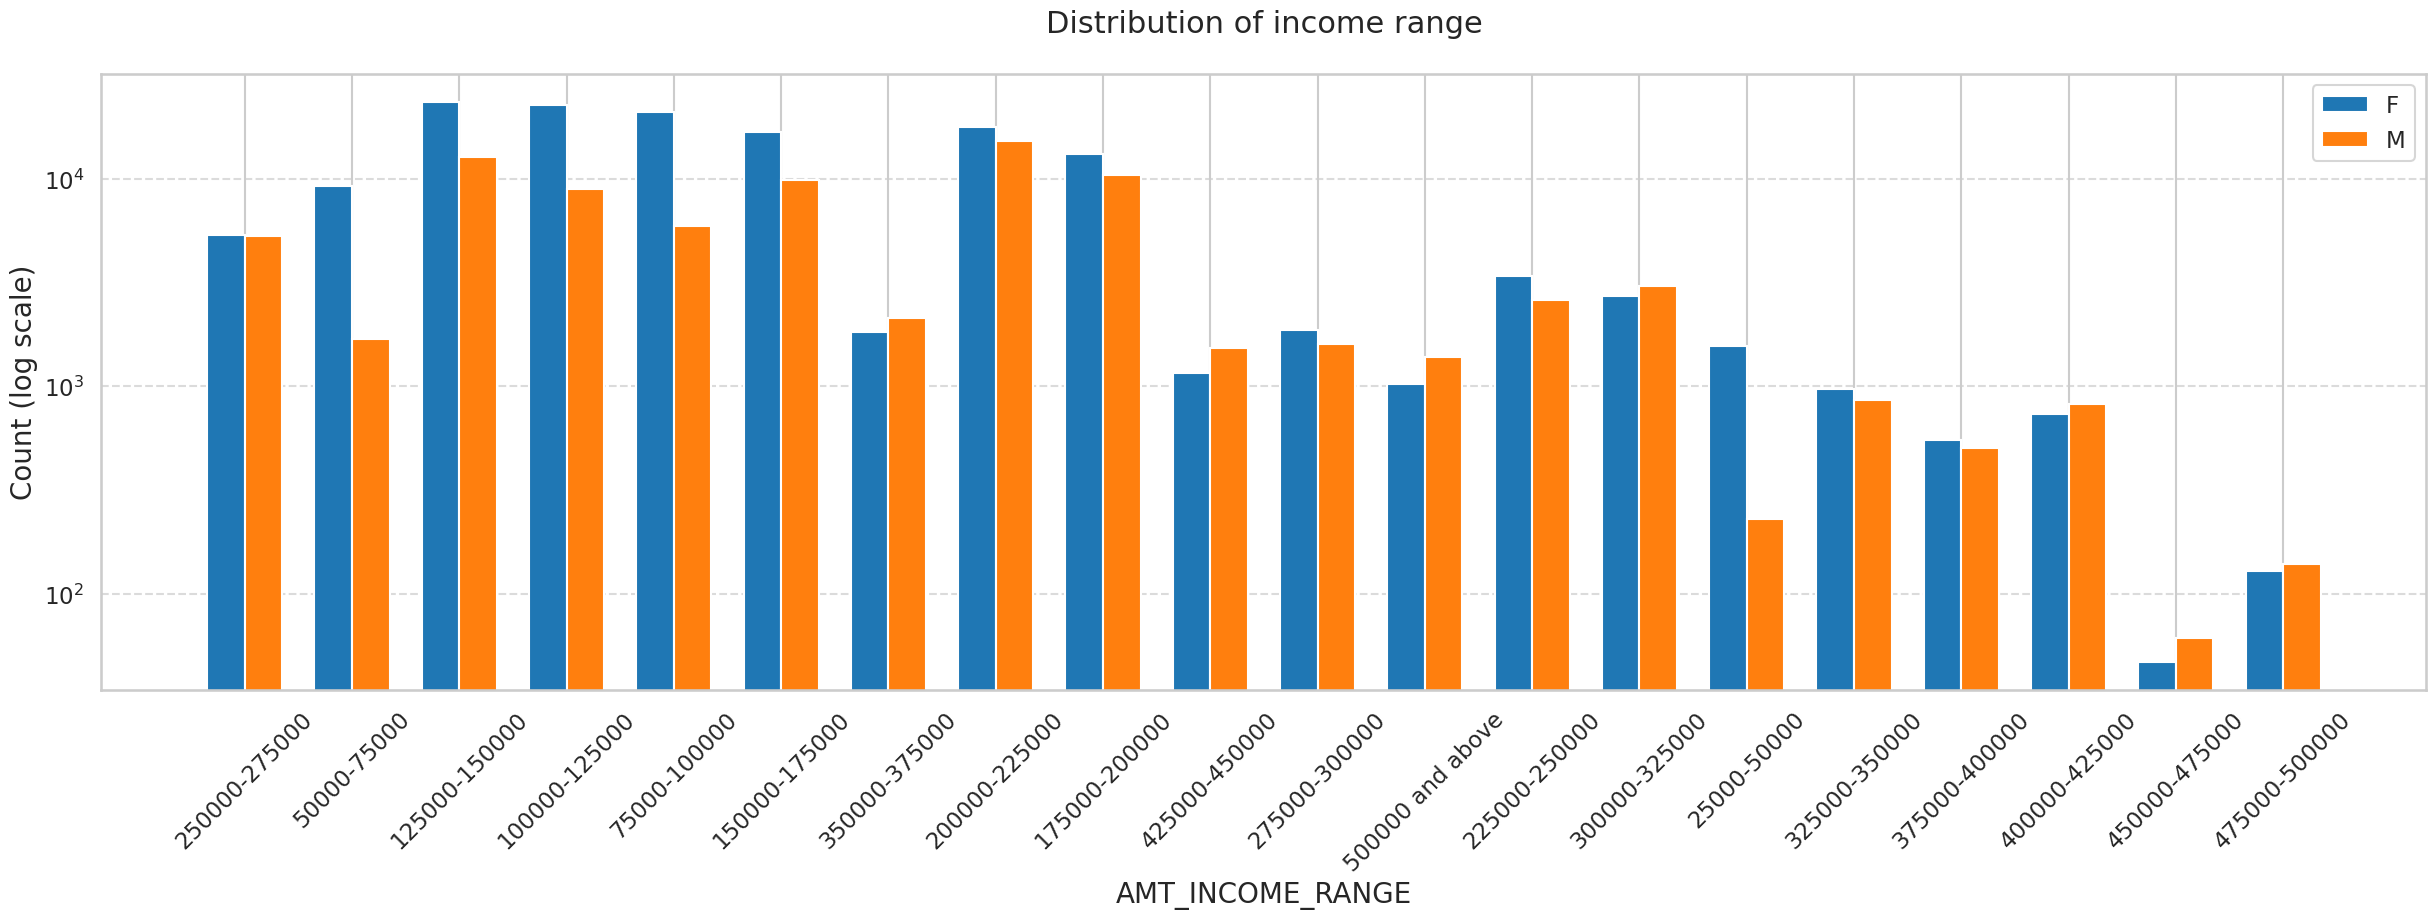

In [ ]:
#Graph for income range
uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.


1.   Female counts are higher than male.
2.   Income range from 100000 to 200000 is having more number of credits.
3.Very less count for income range 400000 and above.





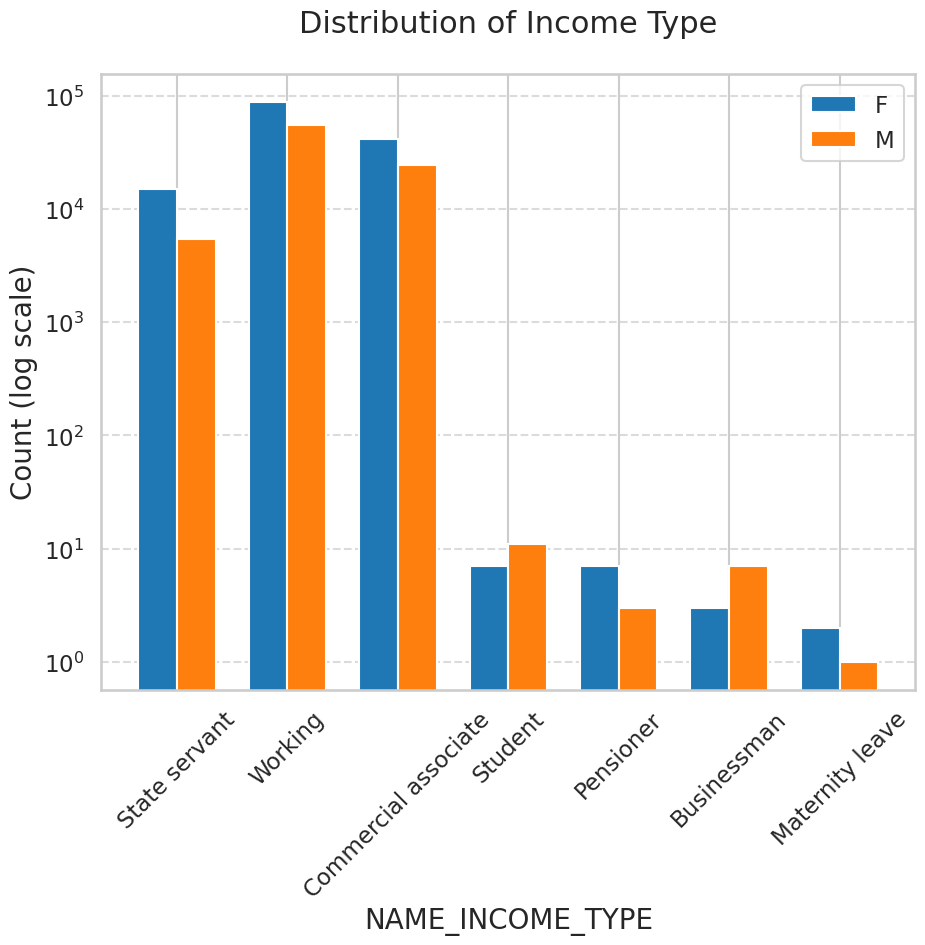

In [ ]:
uniplot(target0,col='NAME_INCOME_TYPE',title='Distribution of Income Type',hue='CODE_GENDER')

Points to be concluded from the above graph
1.for income type 'working','commercial associate', and 'state servant' the number of credits are higher than others.

2.for this females are having more number of credits than male.

3.Less number of credits for income type 'student','pensioner','businessman' and 'maternity leave'.

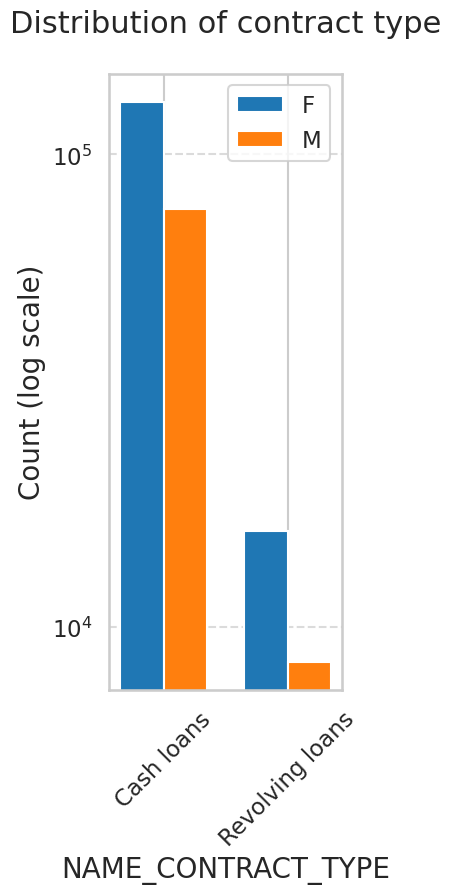

In [ ]:
# Plotting for Contract type

uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
For this also Female is leading for applying credits

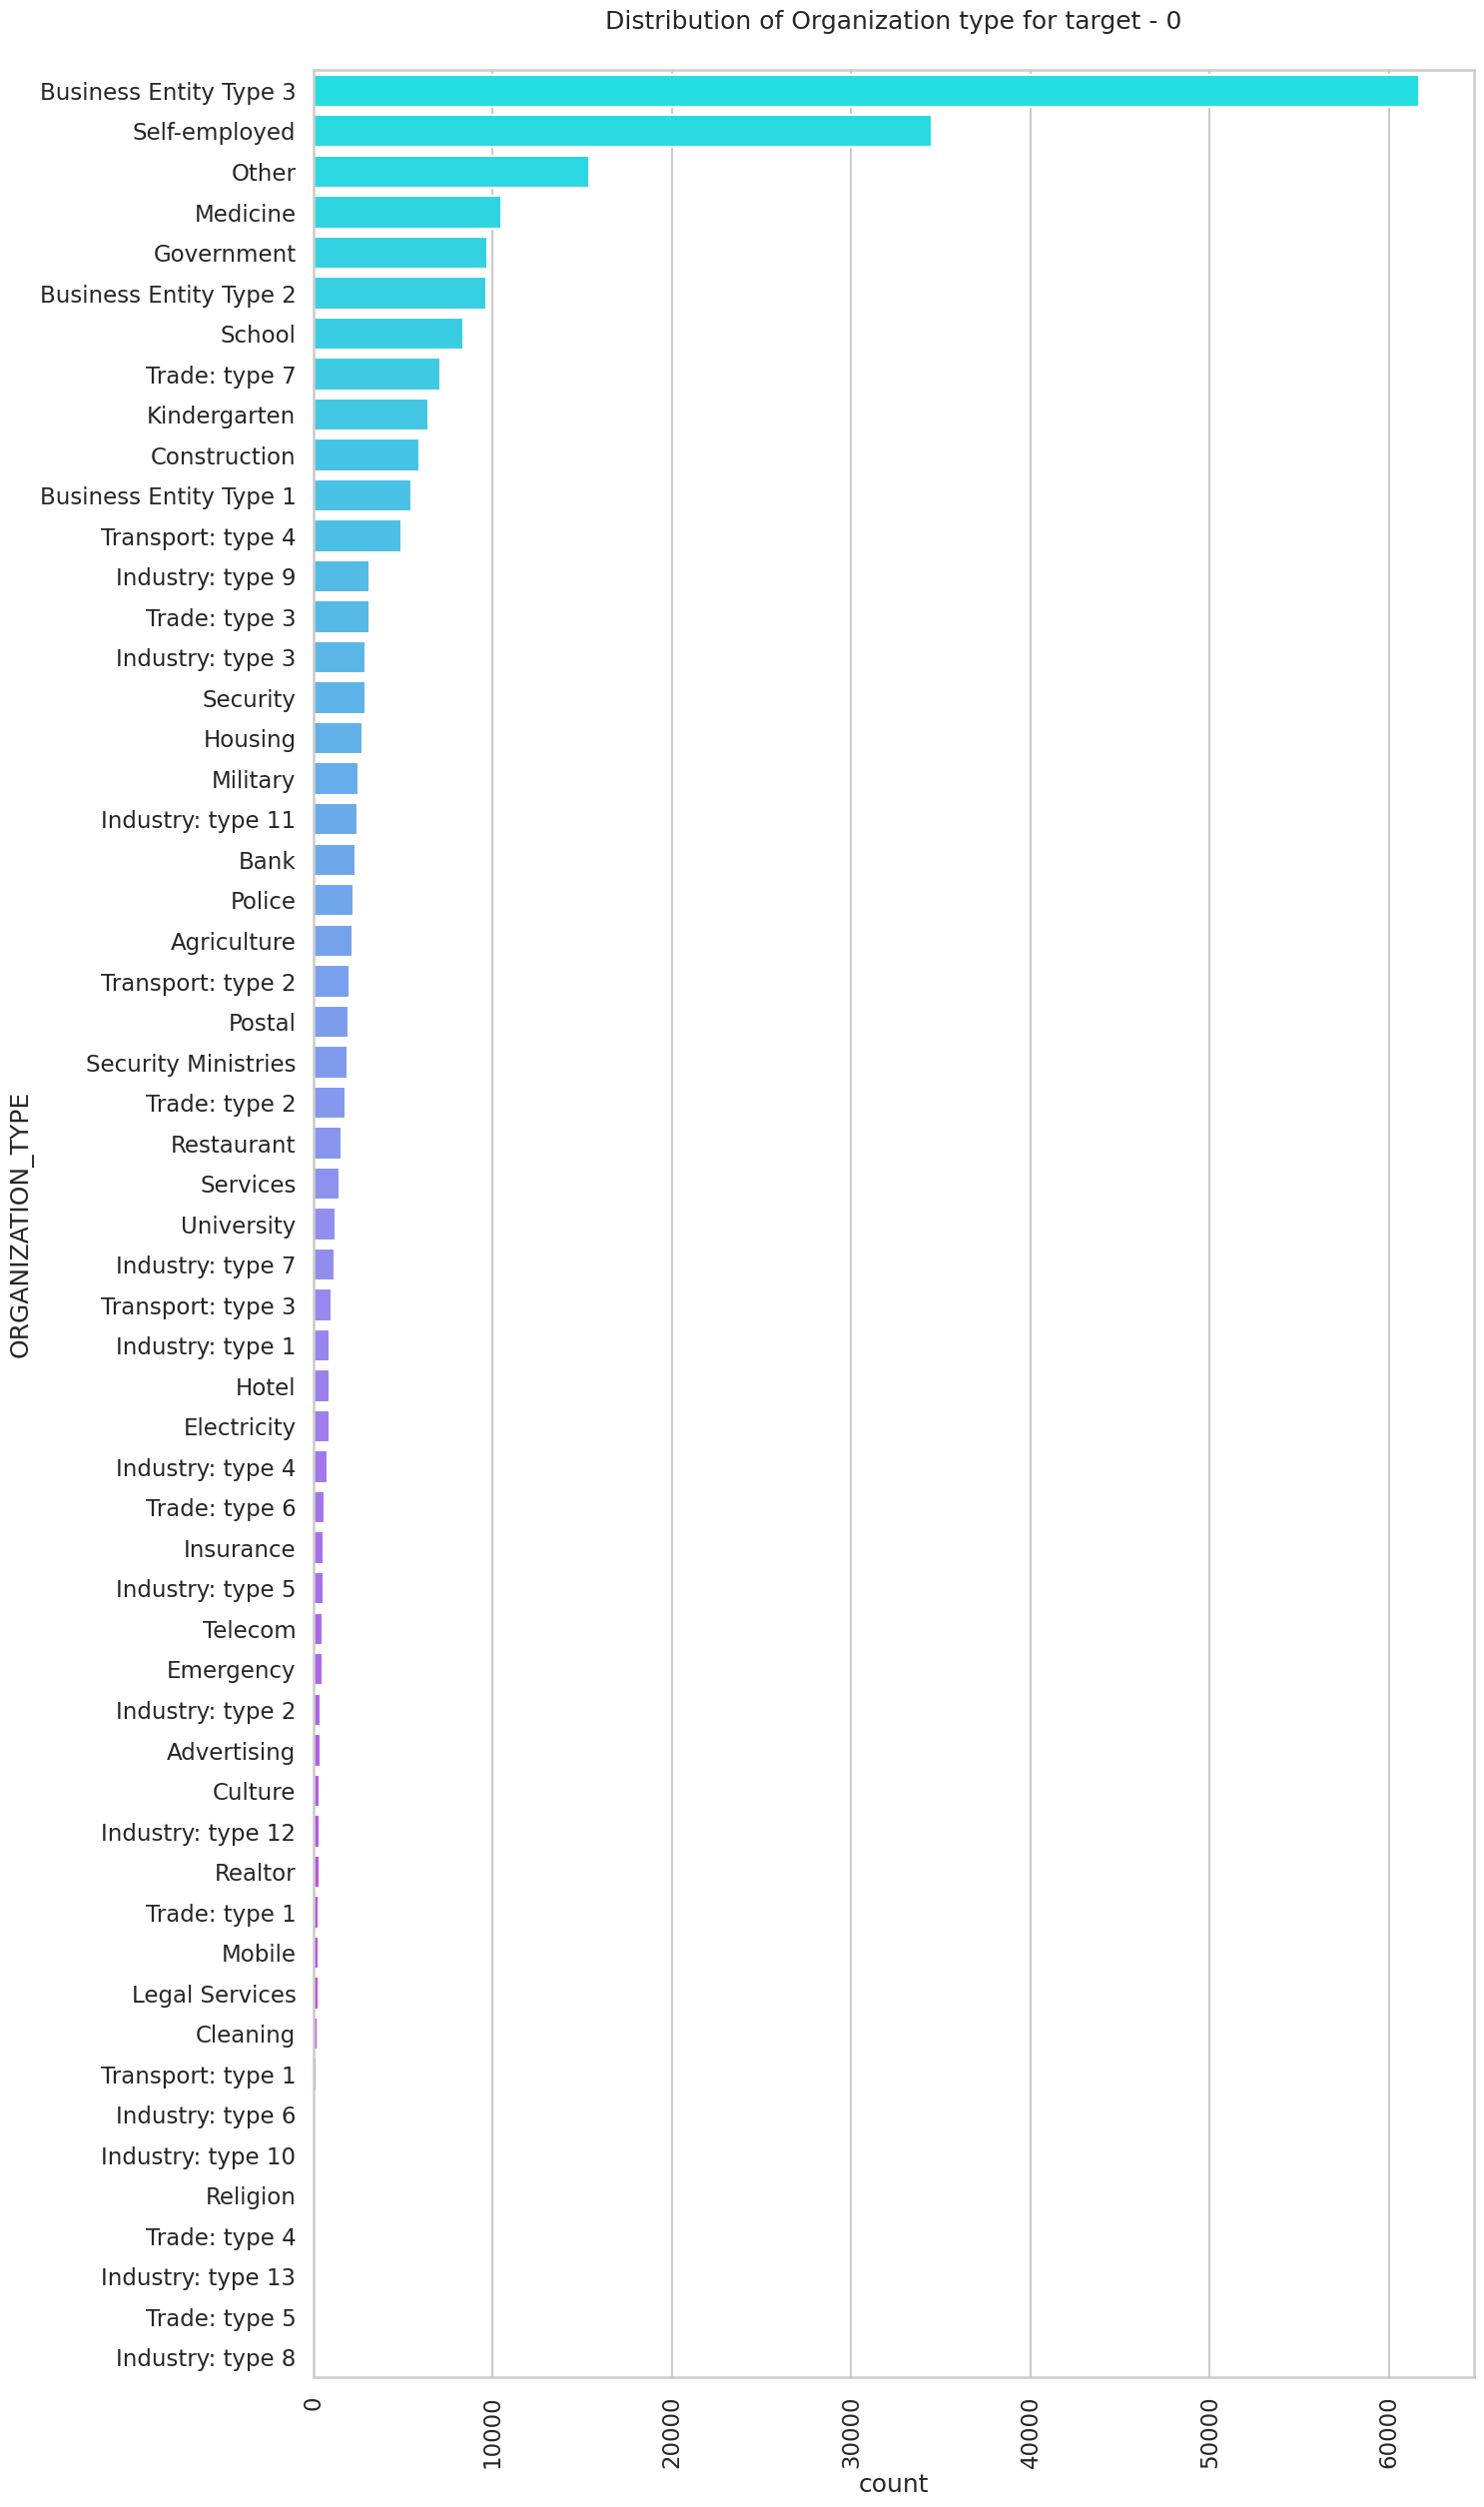

In [ ]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 0")
plt.xticks(rotation=90)
sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()


Points to be concluded from the above graph.

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

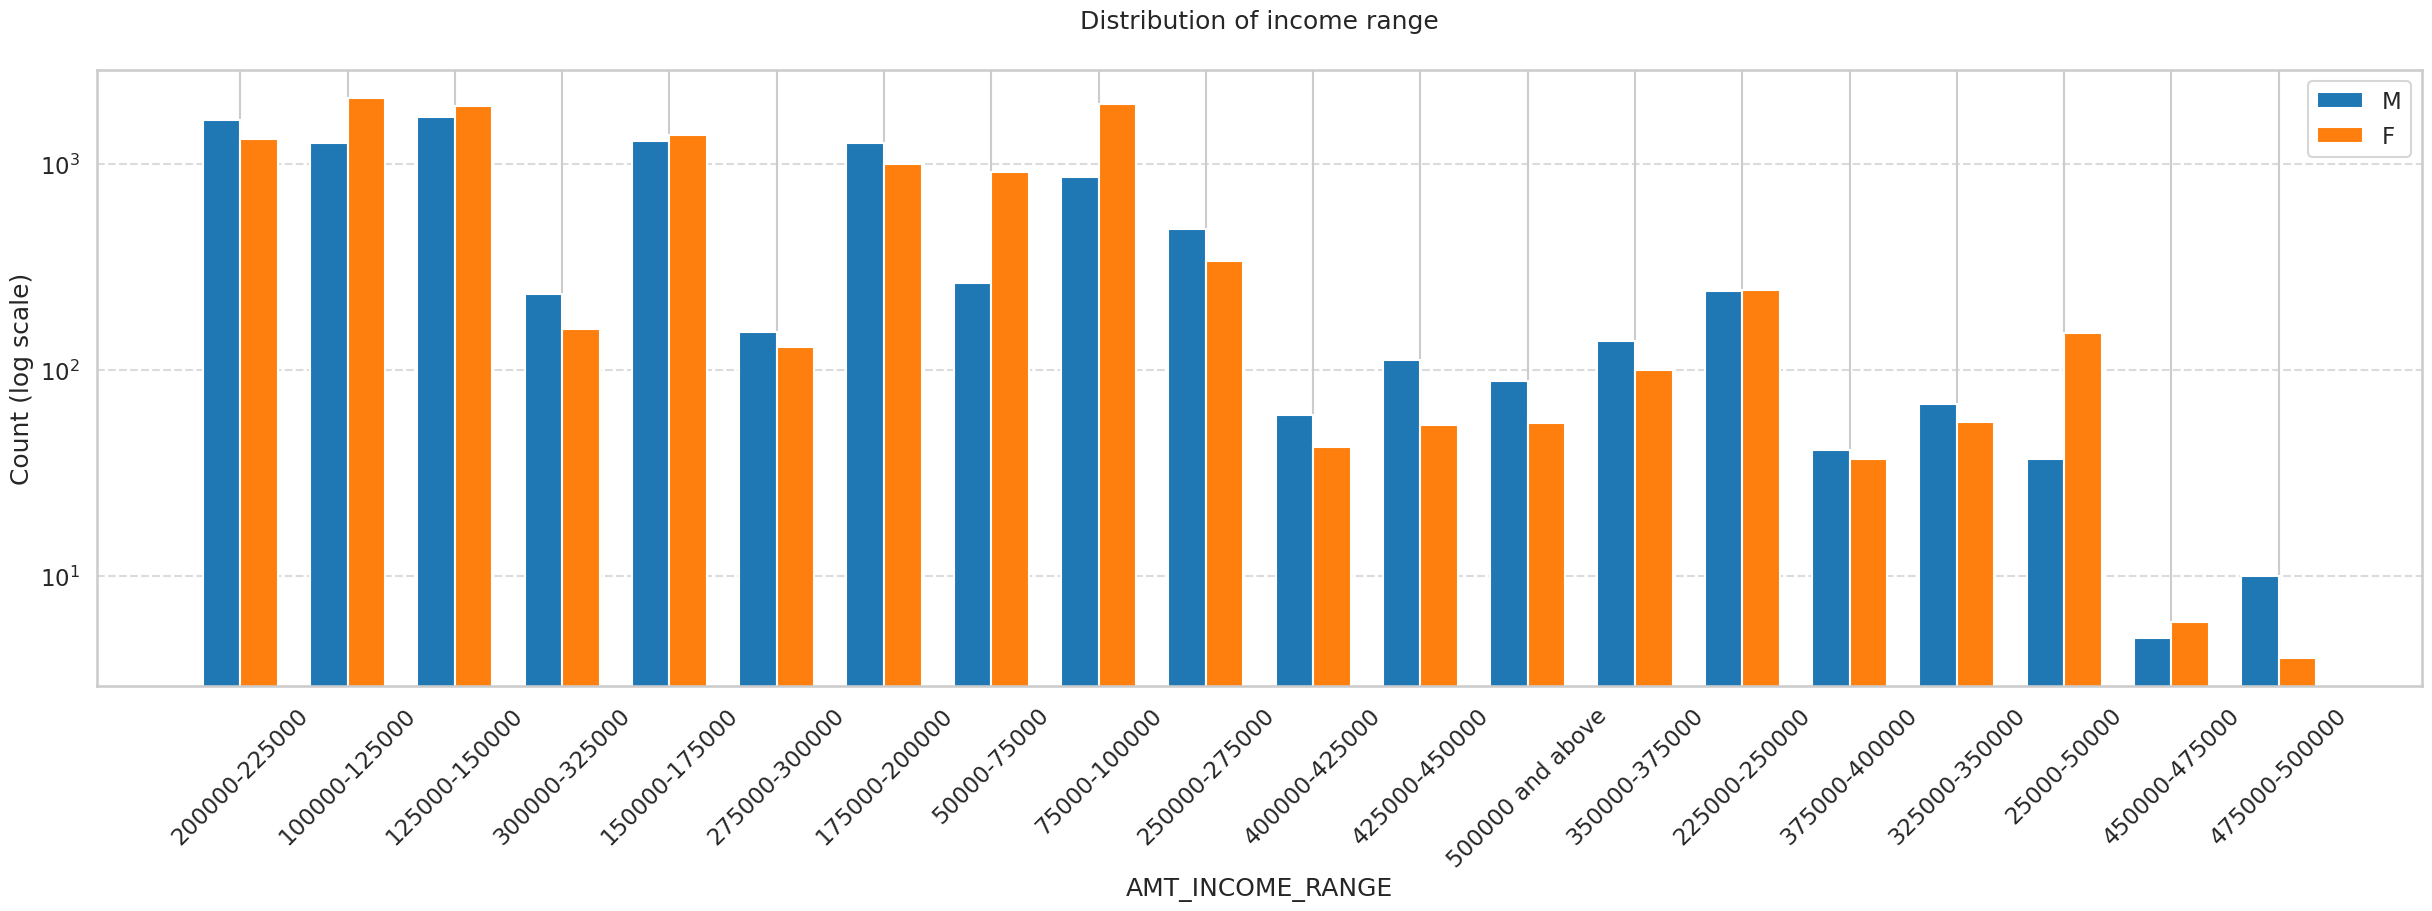

In [ ]:
# PLotting for income range

uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Points to be concluded from the above graph.

Male counts are higher than female.
Income range from 100000 to 200000 is having more number of credits.
This graph show that males are more than female in having credits for that range.
Very less count for income range 400000 and above.

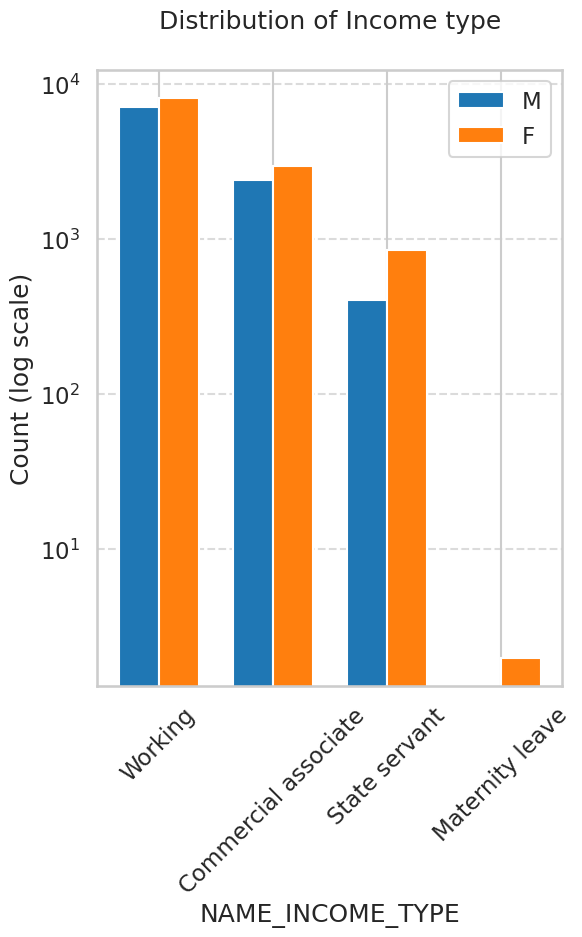

In [ ]:
# Plotting for Income type

uniplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


Points to be concluded from the above graph.

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
For this Females are having more number of credits than male.
Less number of credits for income type ‘Maternity leave’.
For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

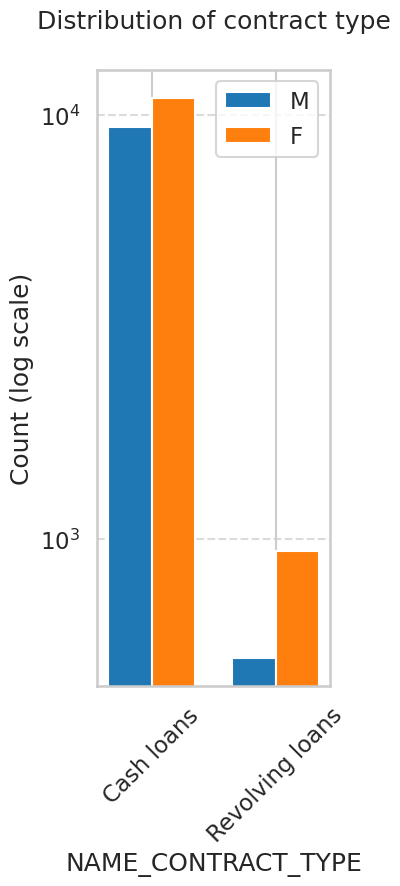

In [ ]:
# Plotting for Contract type

uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


Points to be concluded from the above graph.

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
For this also Female is leading for applying credits.
For type 1 : there is only Female Revolving loans

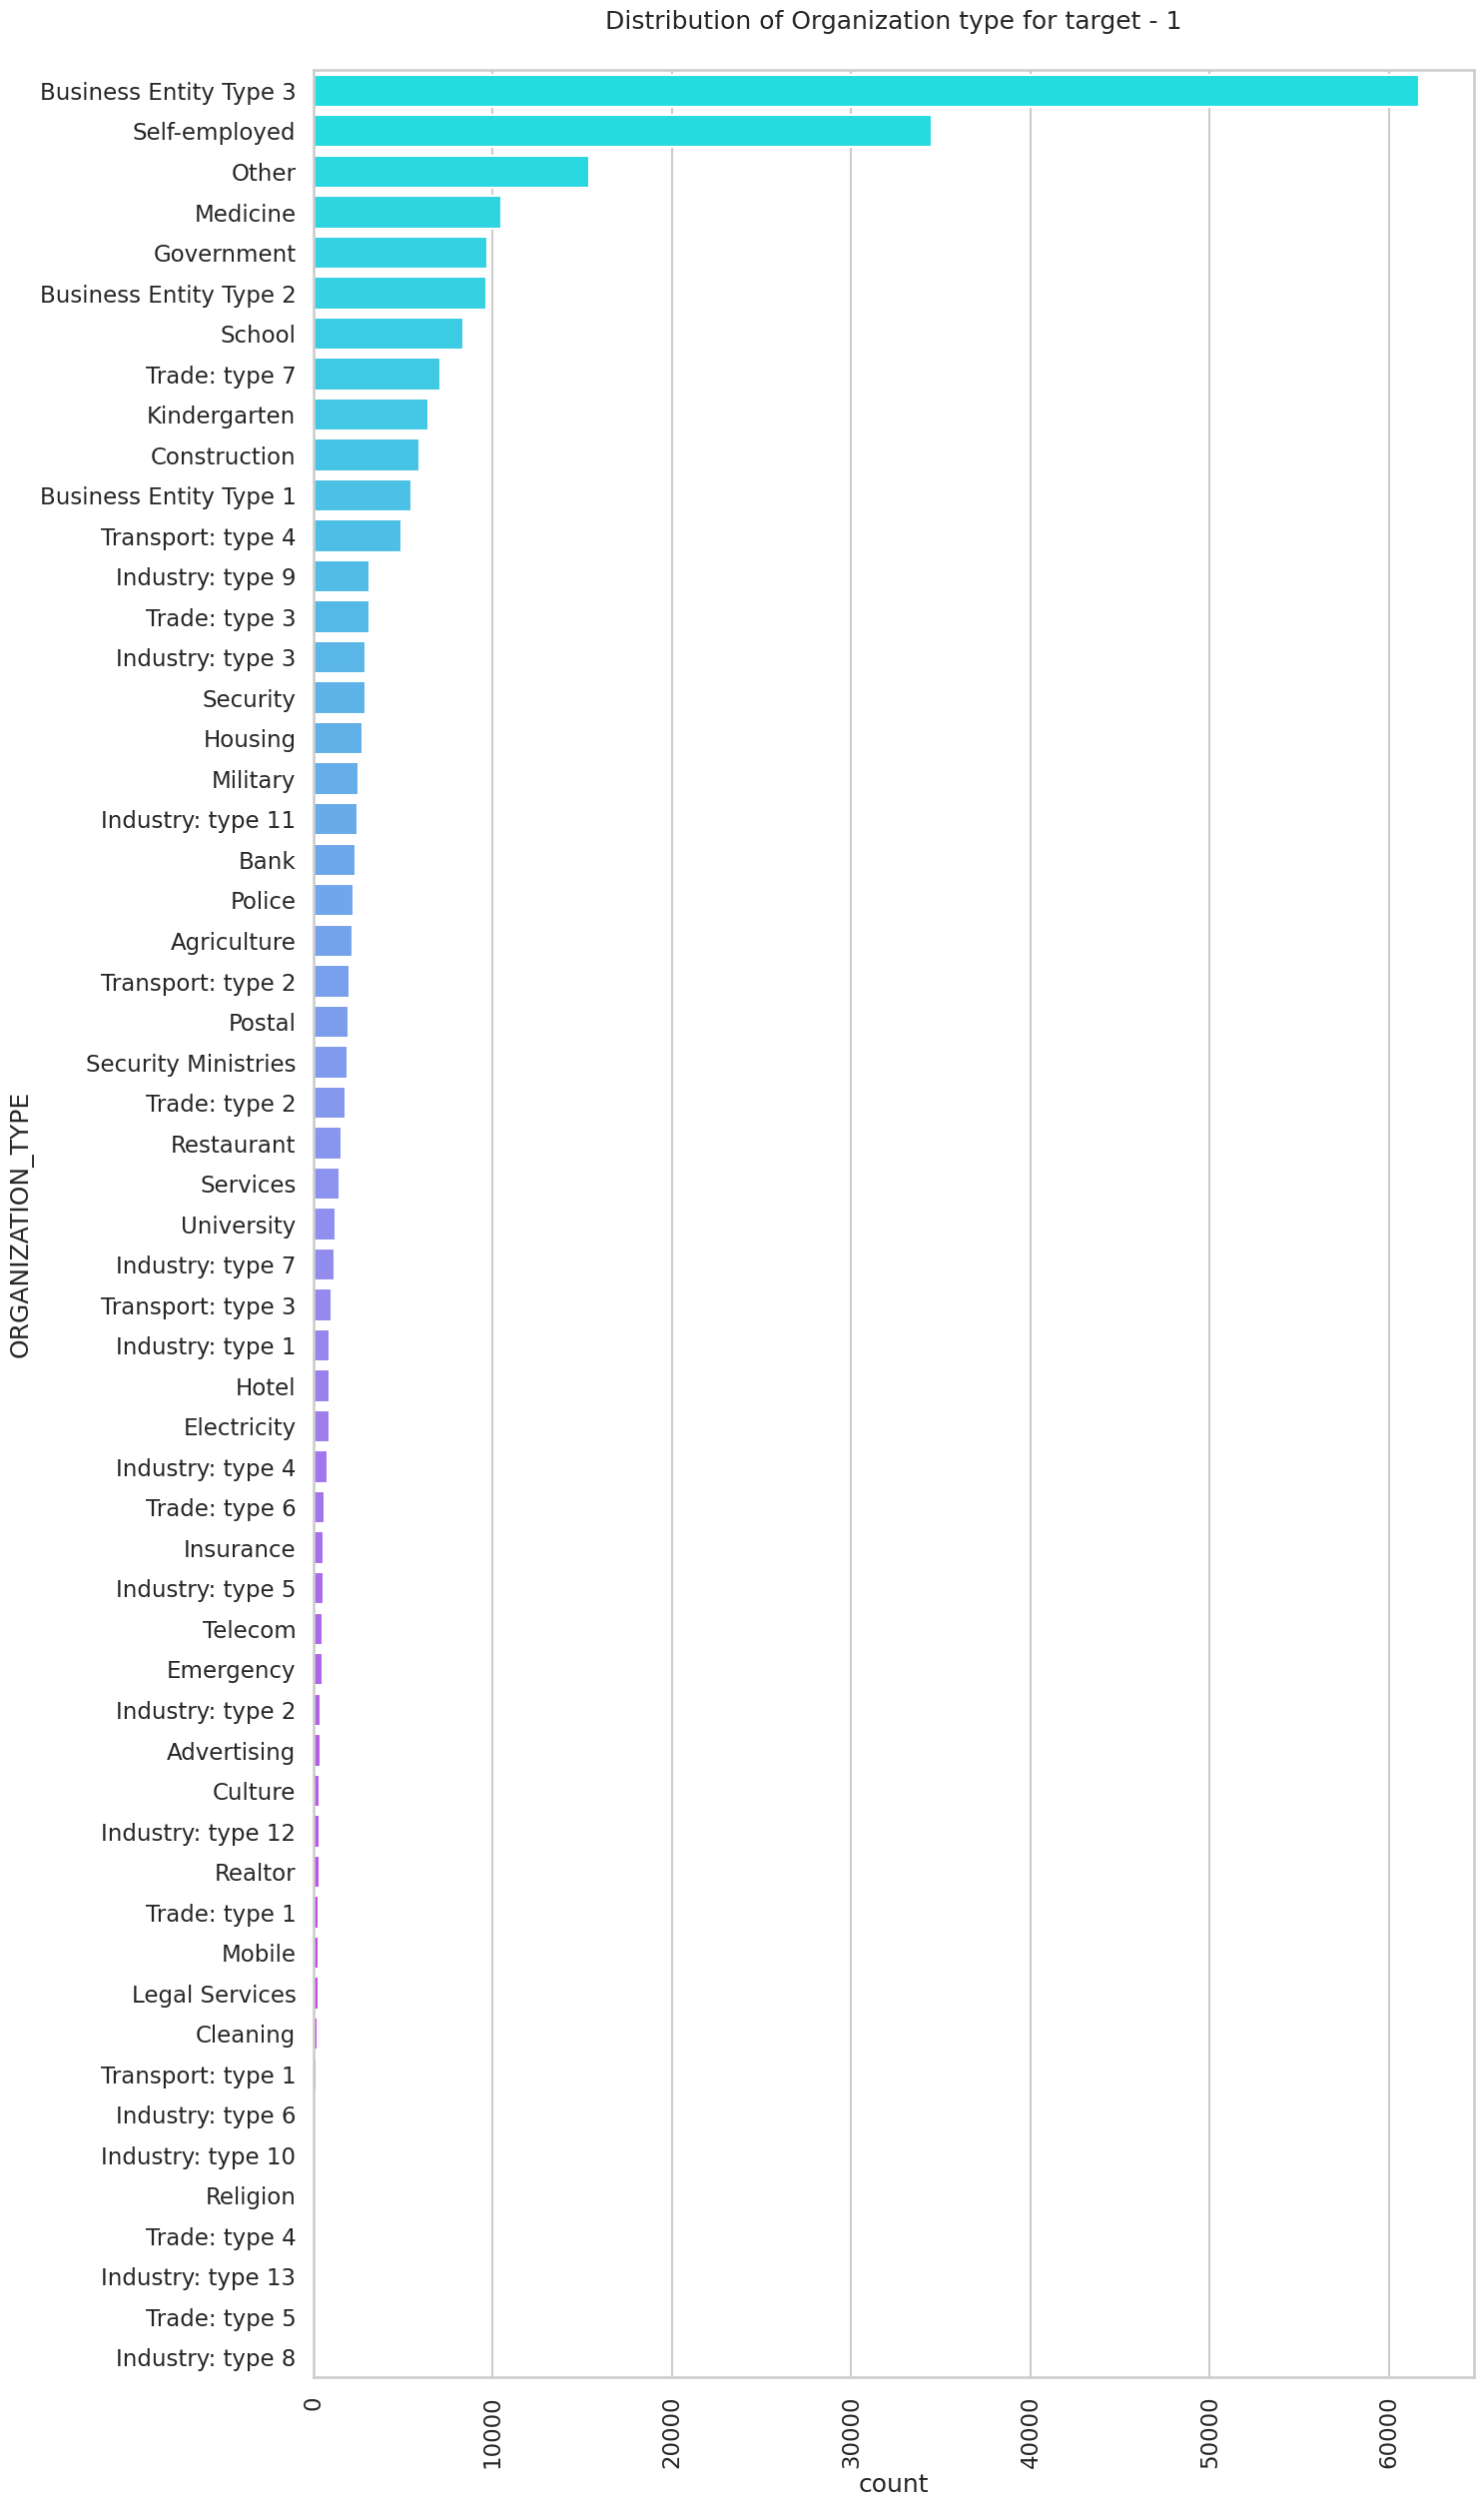

In [ ]:

# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 1")
plt.xticks(rotation=90)
sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()


Points to be concluded from the above graph.

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
Same as type 0 in distribution of organization type.

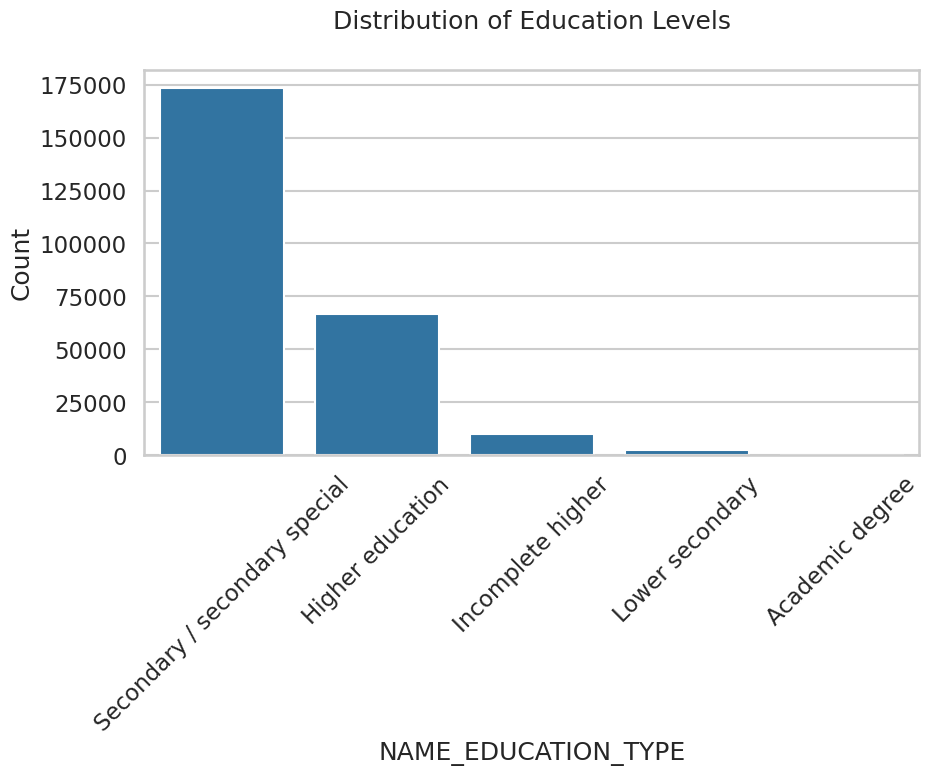

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=applicants, x="NAME_EDUCATION_TYPE",order=applicants["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Education Levels")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Count")
plt.show()

**Univariate analysis for variables**

In [ ]:
#Box plots for univariate variable analysis
def univariate_numerical(data, col, title):
    plt.figure(figsize=(6, 8))
    plt.boxplot(data[col], vert=True, patch_artist=True,
                boxprops=dict(facecolor='orange', color='black'),
                medianprops=dict(color='black'))

    plt.title(title)
    plt.ylabel(col)
    plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


**For Target 0-Finding any outliers**

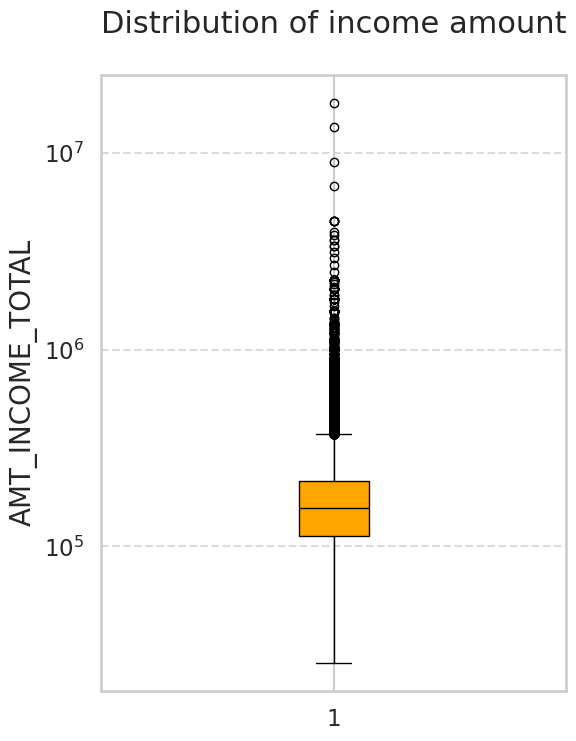

In [ ]:
#distribution of income amount
univariate_numerical(data=target0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

There are some outliers in income amount

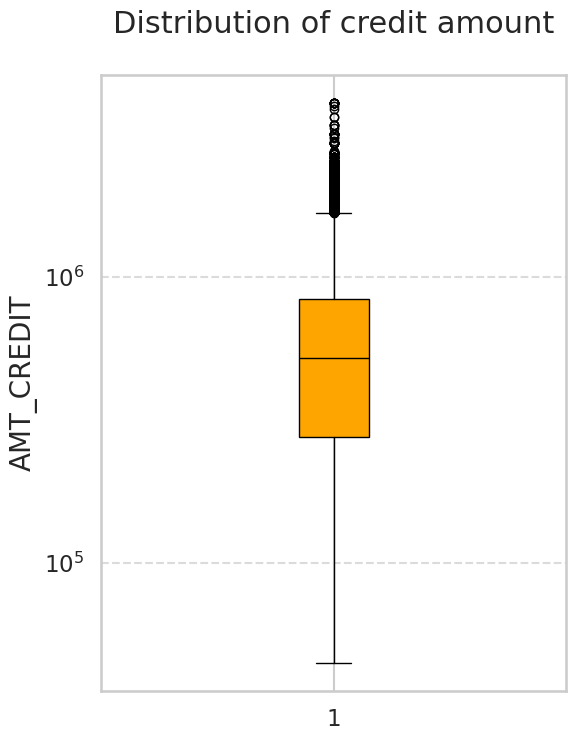

In [ ]:
#Distribution of credit amount
univariate_numerical(data=target0,col='AMT_CREDIT',title='Distribution of credit amount')

Few Points can be concluded from the graph above.
1.The are outliers present in the credit amount
2.The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

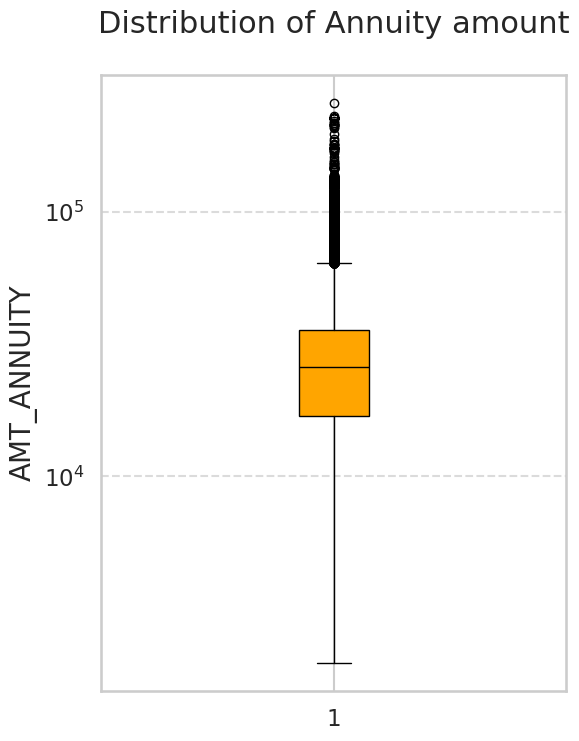

In [ ]:
#Distribution of anuuity amount
univariate_numerical(data=target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from above graphe.
1.Some outliers are noticed in annuity amount.
2.THe first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

**For Target 1- Finding any outliers**

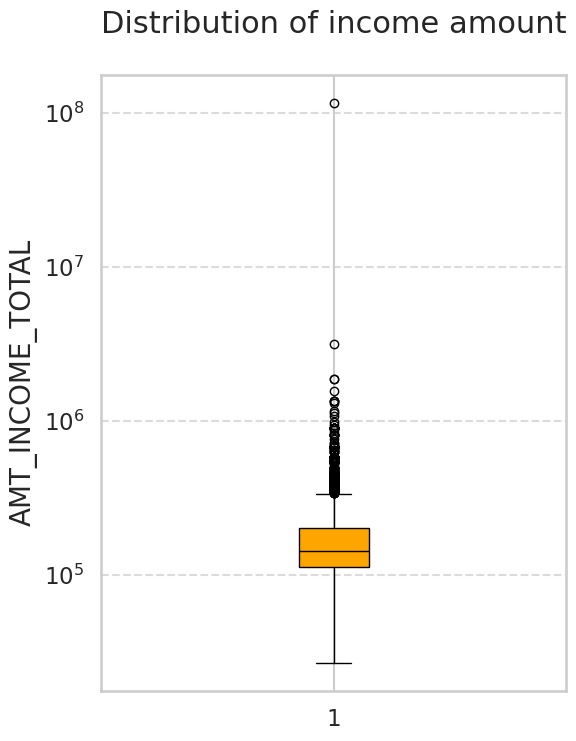

In [ ]:
#distribution of income amount
univariate_numerical(data=target1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few Points can be concluded from the graph above.
1.Some outliers are noticed in income amount
2.Most of the clients of income are present in third quartile.

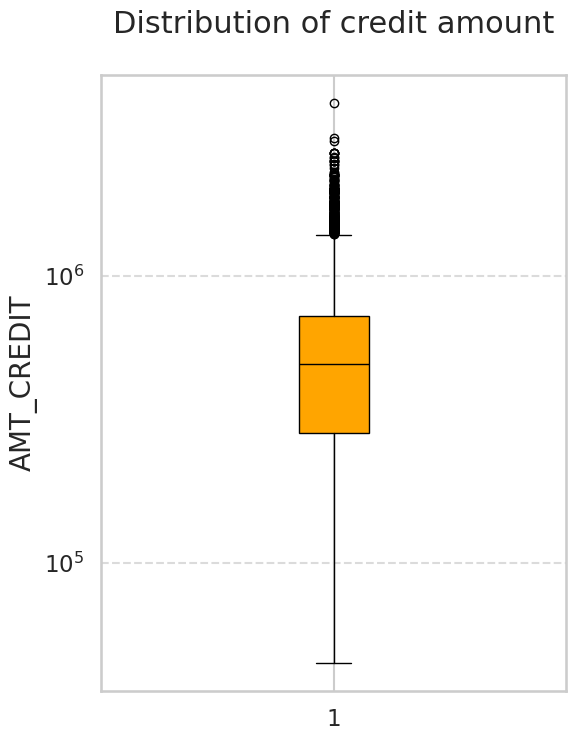

In [ ]:
#Distribution of credit amount
univariate_numerical(data=target1,col='AMT_CREDIT',title='Distribution of credit amount')


Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

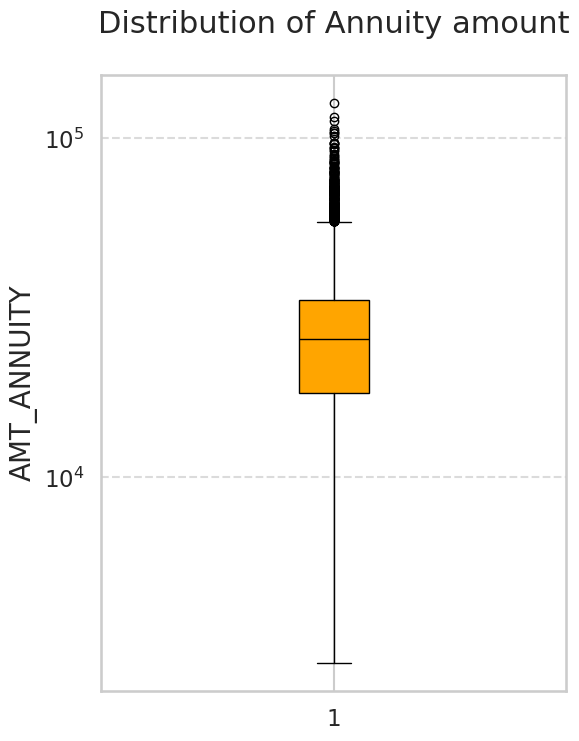

In [ ]:
#Distribution of anuuity amount

univariate_numerical(data=target1,col='AMT_ANNUITY',title='Distribution of Annuity amount')


Few points can be concluded from the graph above.

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

**Bivariate analysis for numerical variables**

**For Target 0**

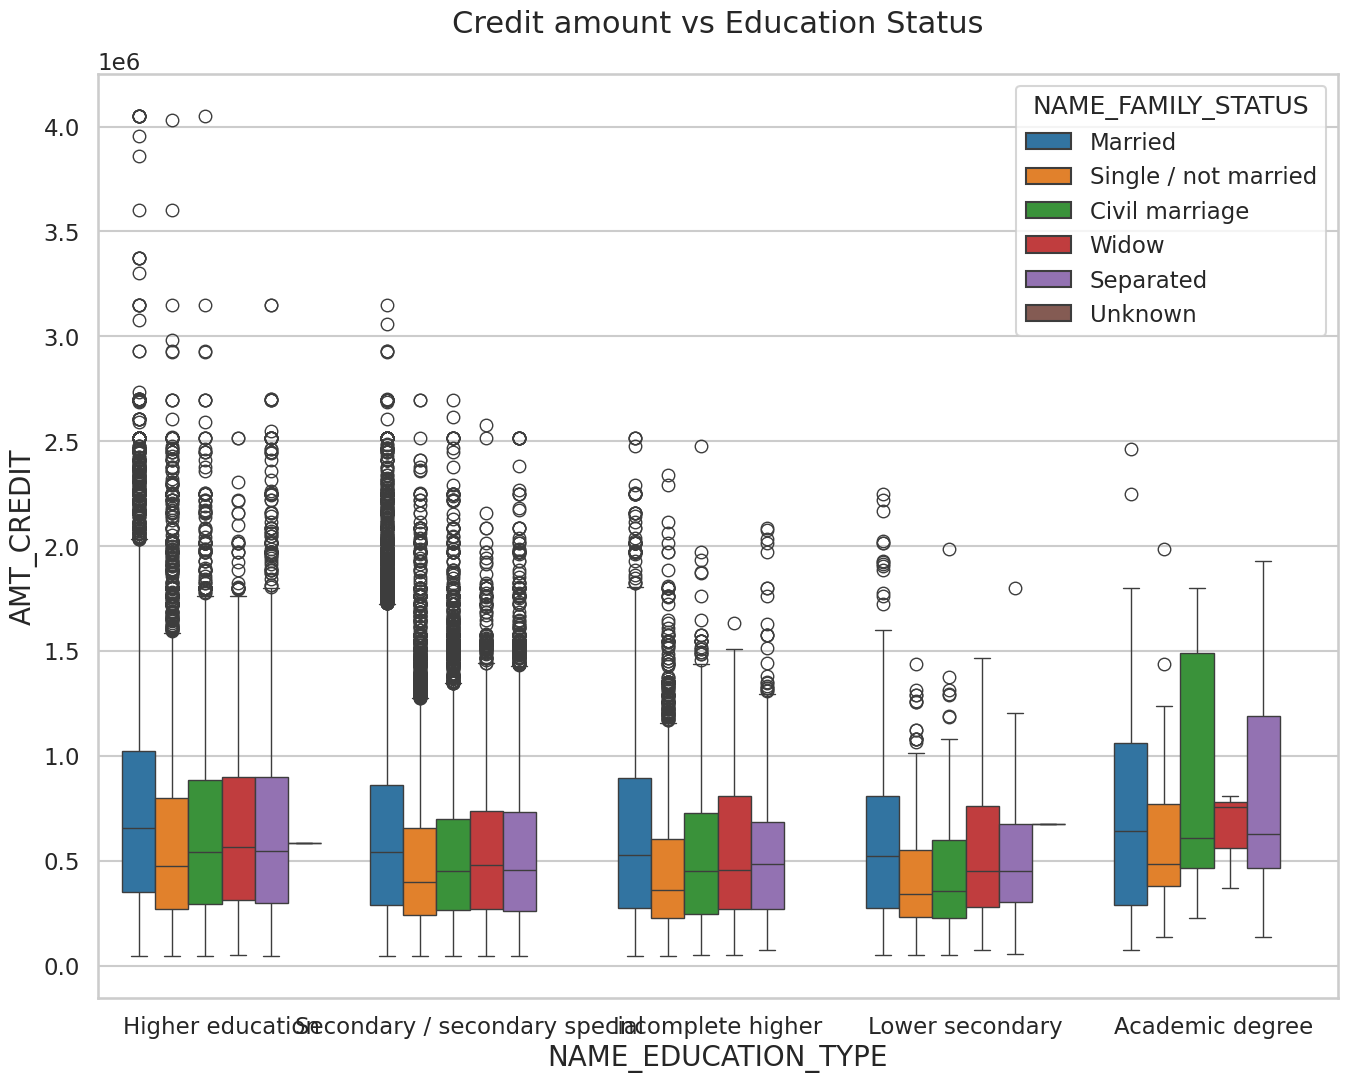

In [ ]:
#box plotting for credit amount
plt.figure(figsize=(16,12))
sns.boxplot(data=target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue="NAME_FAMILY_STATUS",orient='v')
plt.title('Credit amount vs Education Status')
plt.show()



From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

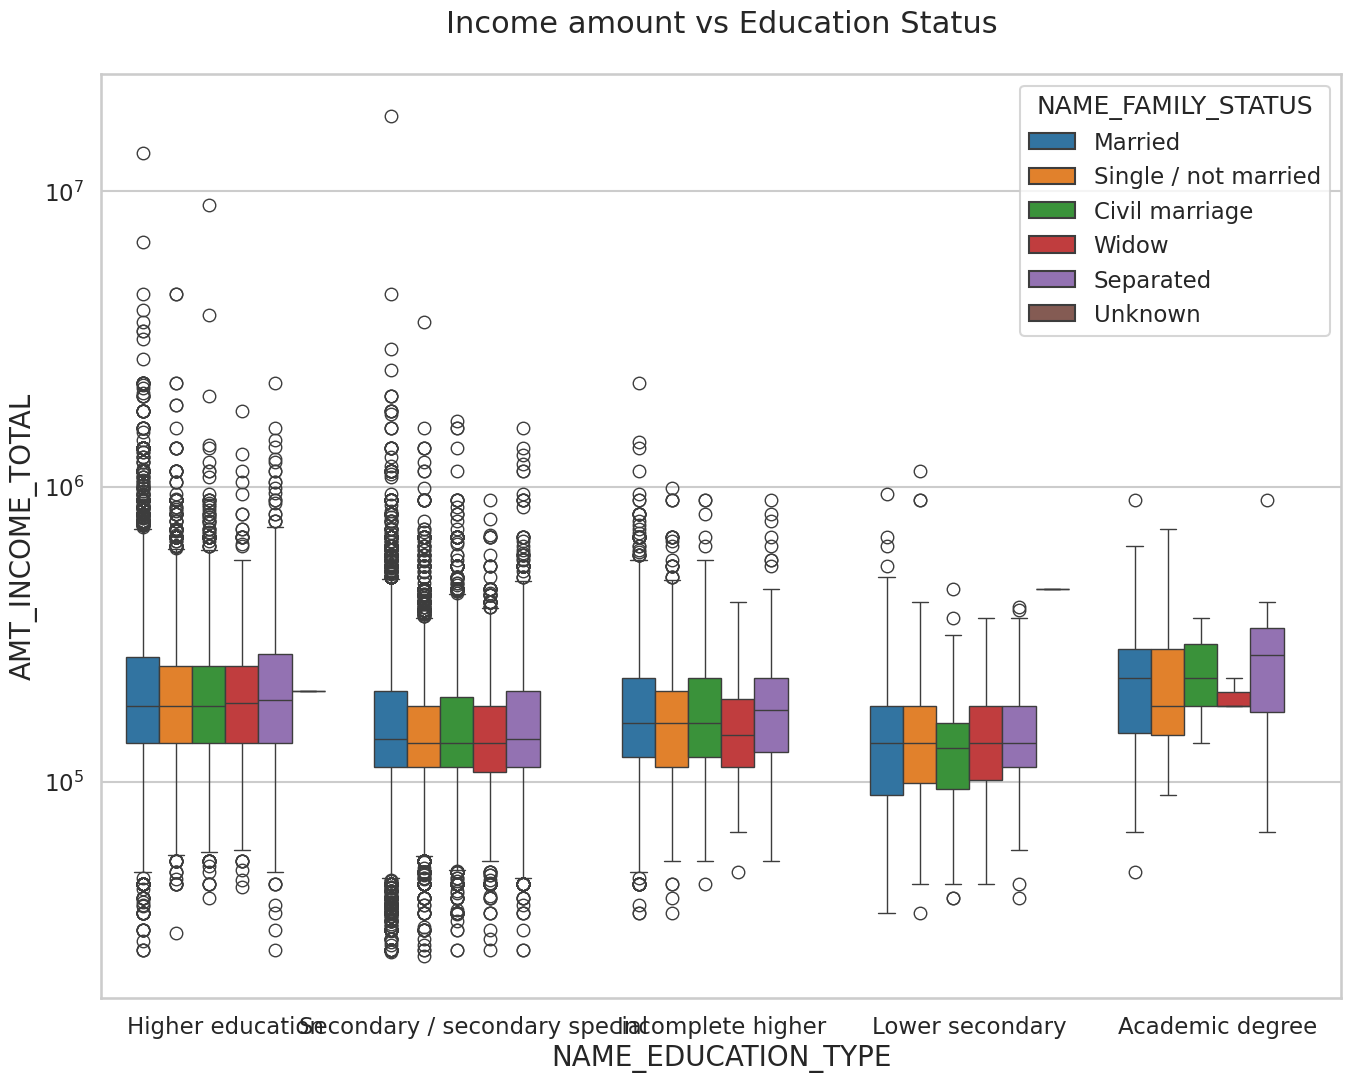

In [ ]:
#box plot for Income amount vs education status
plt.figure(figsize=(16,12))
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()


From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

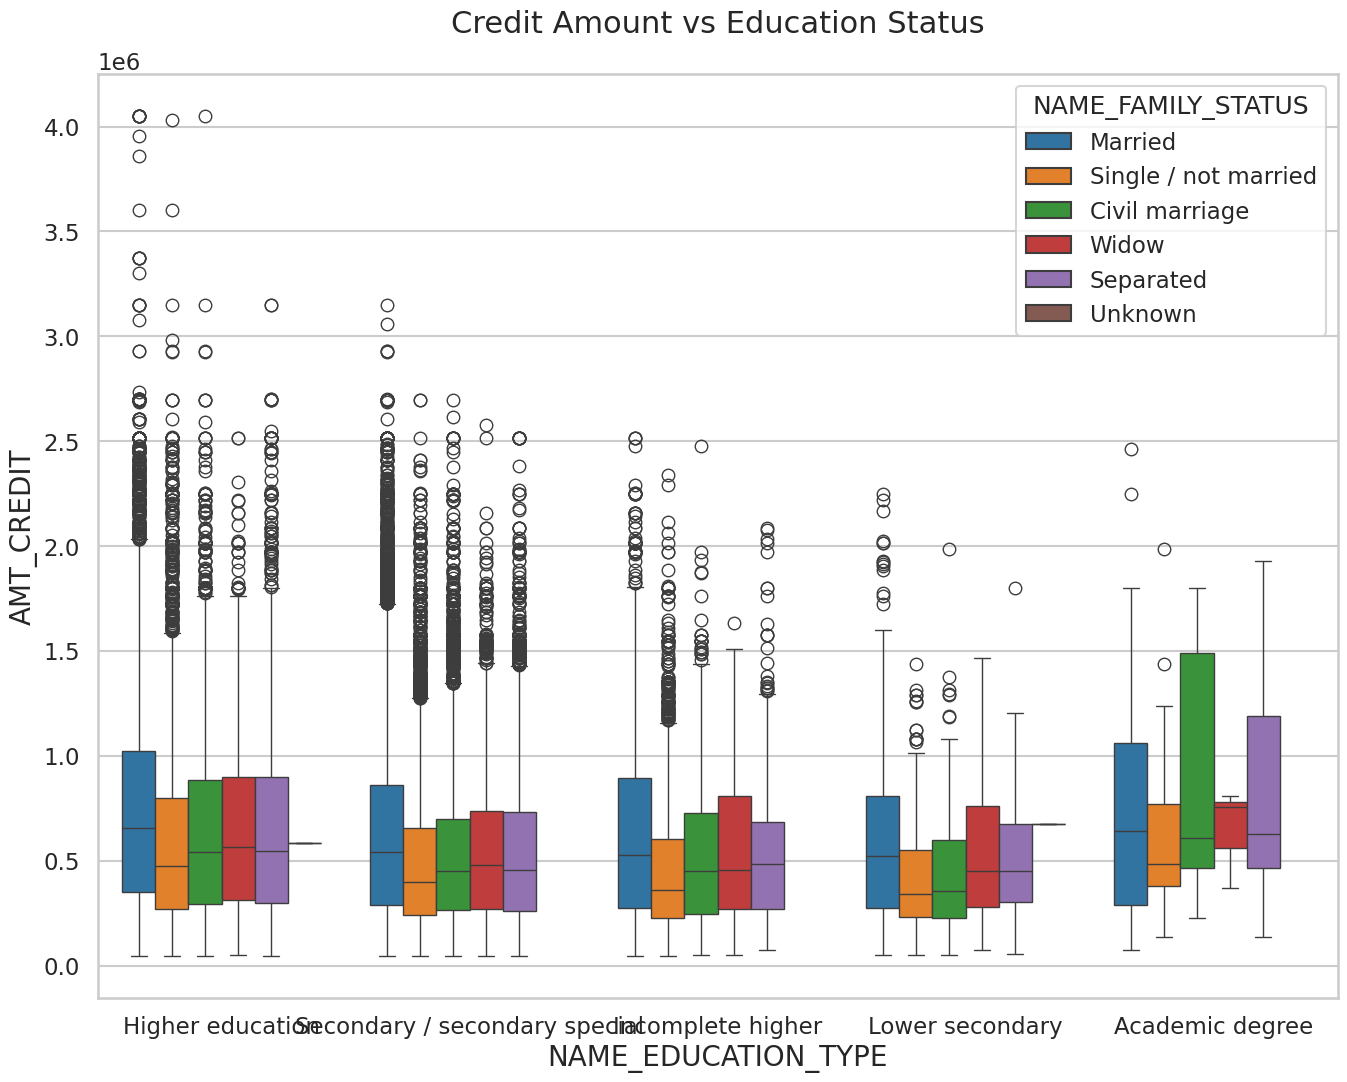

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()


Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

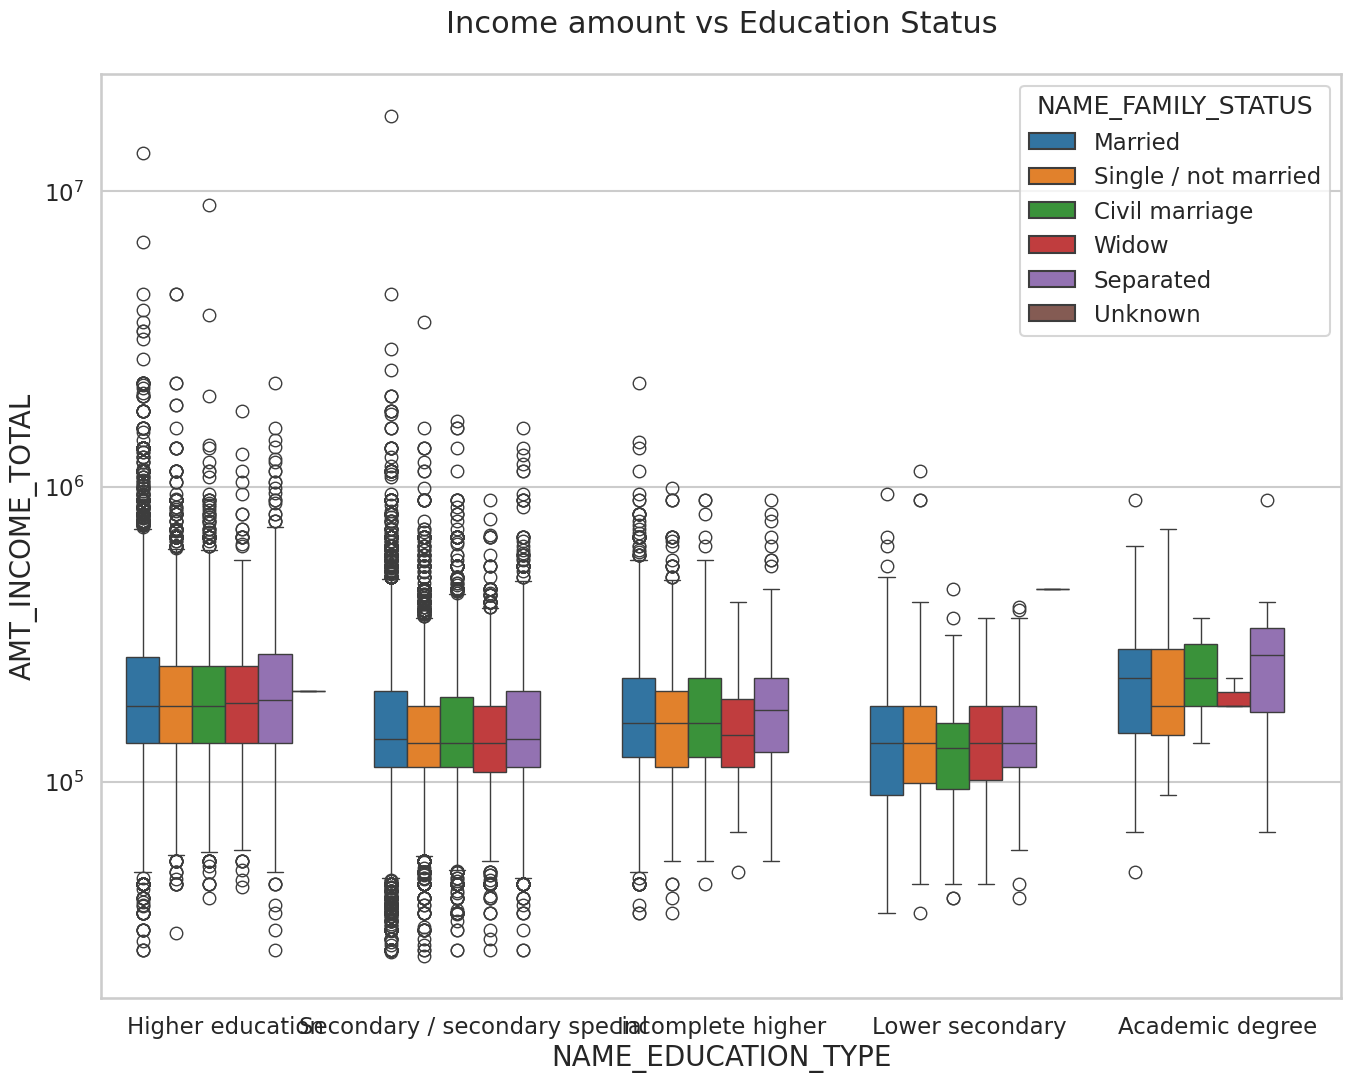

In [ ]:
# Box plotting for Income amount
plt.figure(figsize=(16,12))
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

**Changine the directory of the dataset in the below query as per requirements**

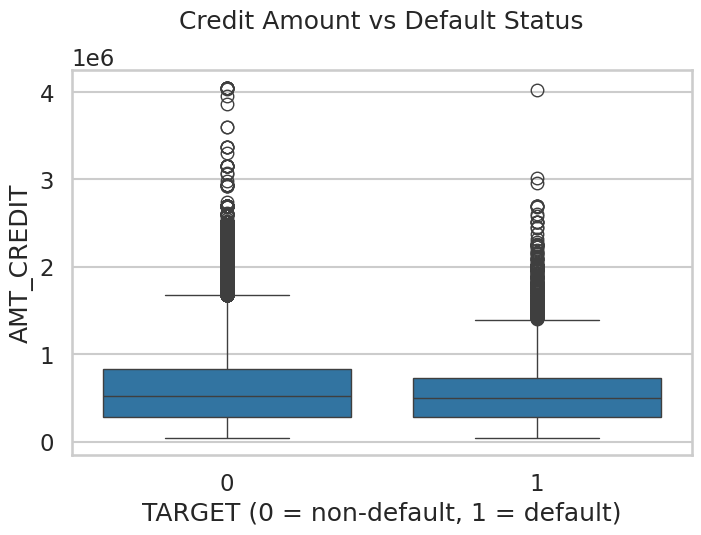

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=applicants, x="TARGET", y="AMT_CREDIT")
plt.title("Credit Amount vs Default Status")
plt.xlabel("TARGET (0 = non-default, 1 = default)")
plt.ylabel("AMT_CREDIT")
plt.show()

Median credit amount is slightly higher for non-defaulters than defaulters. This suggests people with smaller loans tend to default more often.

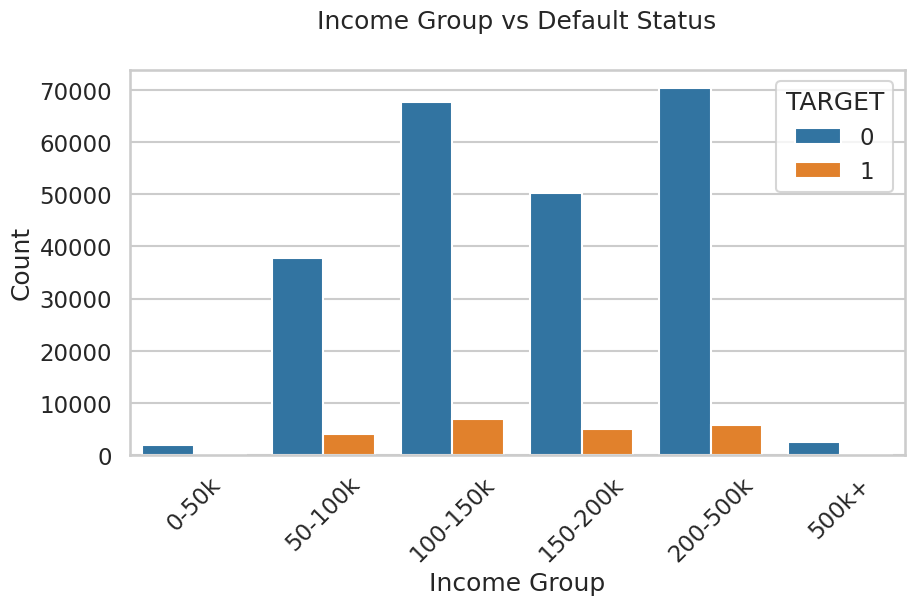

In [ ]:
income_bins = [0, 50000, 100000, 150000, 200000, 500000, applicants["AMT_INCOME_TOTAL"].max()]
income_labels = ["0-50k", "50-100k", "100-150k", "150-200k", "200-500k", "500k+"]
applicants["INCOME_GROUP"] = pd.cut(applicants["AMT_INCOME_TOTAL"],bins=income_bins,labels=income_labels,include_lowest=True)
plt.figure(figsize=(10, 5))
sns.countplot(data=applicants, x="INCOME_GROUP", hue="TARGET")
plt.title("Income Group vs Default Status")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Lower-income groups show a higher proportion of defaults. As income increases, default tendency gradually decreases, indicating repayment capacity improves with income.

**MULTI-VARIATE Analysis**

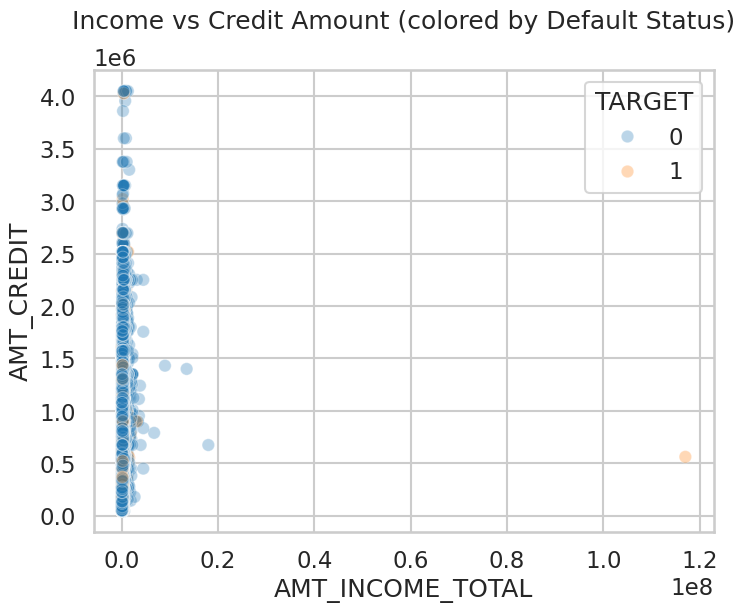

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=applicants,x="AMT_INCOME_TOTAL",y="AMT_CREDIT",hue="TARGET",alpha=0.3)
plt.title("Income vs Credit Amount (colored by Default Status)")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.show()

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ["18-25", "25-35", "35-45", "45-55", "55-65", "65+"]
applicants["AGE_GROUP"] = pd.cut(applicants["AGE_YEARS"], bins=age_bins, labels=age_labels)
pivot_age_occ = applicants.groupby(["AGE_GROUP", "OCCUPATION_TYPE"])["TARGET"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_age_occ, x="AGE_GROUP", y="TARGET", hue="OCCUPATION_TYPE")
plt.title("Default Rate by Age Group and Occupation")
plt.xlabel("AGE_GROUP")
plt.ylabel("Mean Default Rate")
plt.show()

KeyError: 'OCCUPATION_TYPE'

In [ ]:
previous=pd.read_csv('/content/drive/MyDrive/credit_risk_previous_loans.csv')

In [ ]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Cleaning the missing data**

There are total 15 columns with null values more than 40% so we need to remove them.

In [ ]:
# Columns with more than 40% nulls
null_frac = previous.isnull().mean()
emptycol1 = null_frac[null_frac > 0.4].index
previous.drop(columns=emptycol1, inplace=True)


In [ ]:
previous.shape

(1670214, 26)

Removing the column values of 'XNA' and 'XAP'

In [ ]:
previous=previous.drop(previous[previous['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous=previous.drop(previous[previous['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [ ]:
previous.shape

(69635, 26)

In [ ]:
merged_df = pd.merge(applicants,previous,on='SK_ID_CURR',how='inner',suffixes=('', '_prev'))


In [ ]:
merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51415,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,24.0,middle,Cash Street: middle
51416,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
51417,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
51418,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,New,XNA,Cash,walk-in,Country-wide,21,Connectivity,12.0,high,Cash Street: high


In [ ]:
missing_previous = previous.isnull().sum().sort_values(ascending=False)

In [ ]:
missing_percent_prev = (previous.isnull().mean() * 100).sort_values(ascending=False)

In [ ]:
emptycol_prev = missing_percent_prev[missing_percent_prev > 40].index

In [ ]:
previous.drop(columns=emptycol_prev, inplace=True)

In [ ]:
num_cols_prev = previous.select_dtypes(include=["int64", "float64"]).columns


In [ ]:
for col in num_cols_prev:
    if previous[col].isnull().sum() > 0:
        previous[col].fillna(previous[col].median(), inplace=True)

In [ ]:
cat_cols_prev = previous.select_dtypes(include=["object"]).columns

In [ ]:
for col in cat_cols_prev:
    if previous[col].isnull().sum() > 0:
        previous[col].fillna(previous[col].mode()[0], inplace=True)

In [ ]:
# Renaming the column names after merging

merged_df.rename(columns={'AMT_CREDIT_prev': 'PREV_AMT_CREDIT','AMT_ANNUITY_prev': 'PREV_AMT_ANNUITY'}, inplace=True)


In [ ]:
# Removing unwanted columns for analysis
cols_to_drop = [
    'SK_ID_CURR',
    'WEEKDAY_APPR_PROCESS_START', 'PREV_WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'PREV_HOUR_APPR_PROCESS_START',
    'REG_REGION_NOT_LIVE_REGION', 'PREV_REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION', 'PREV_REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'PREV_LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'PREV_REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'PREV_REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY', 'PREV_LIVE_CITY_NOT_WORK_CITY',
    'FLAG_LAST_APPL_PER_CONTRACT', 'PREV_FLAG_LAST_APPL_PER_CONTRACT',
    'NFLAG_LAST_APPL_IN_DAY', 'PREV_NFLAG_LAST_APPL_IN_DAY'
]

new_df = merged_df.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [ ]:
new_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_prev', 'PREV_AMT_ANNUITY',
       'AMT_APPLICATION', 'PREV_AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START_prev', 'HOUR_APPR_PROCESS_START_prev',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype

In [ ]:
print("Applicants rows:", len(applicants))
print("Previous rows:", len(previous))
print("Merged rows:", len(new_df))

Applicants rows: 252137
Previous rows: 69635
Merged rows: 51420


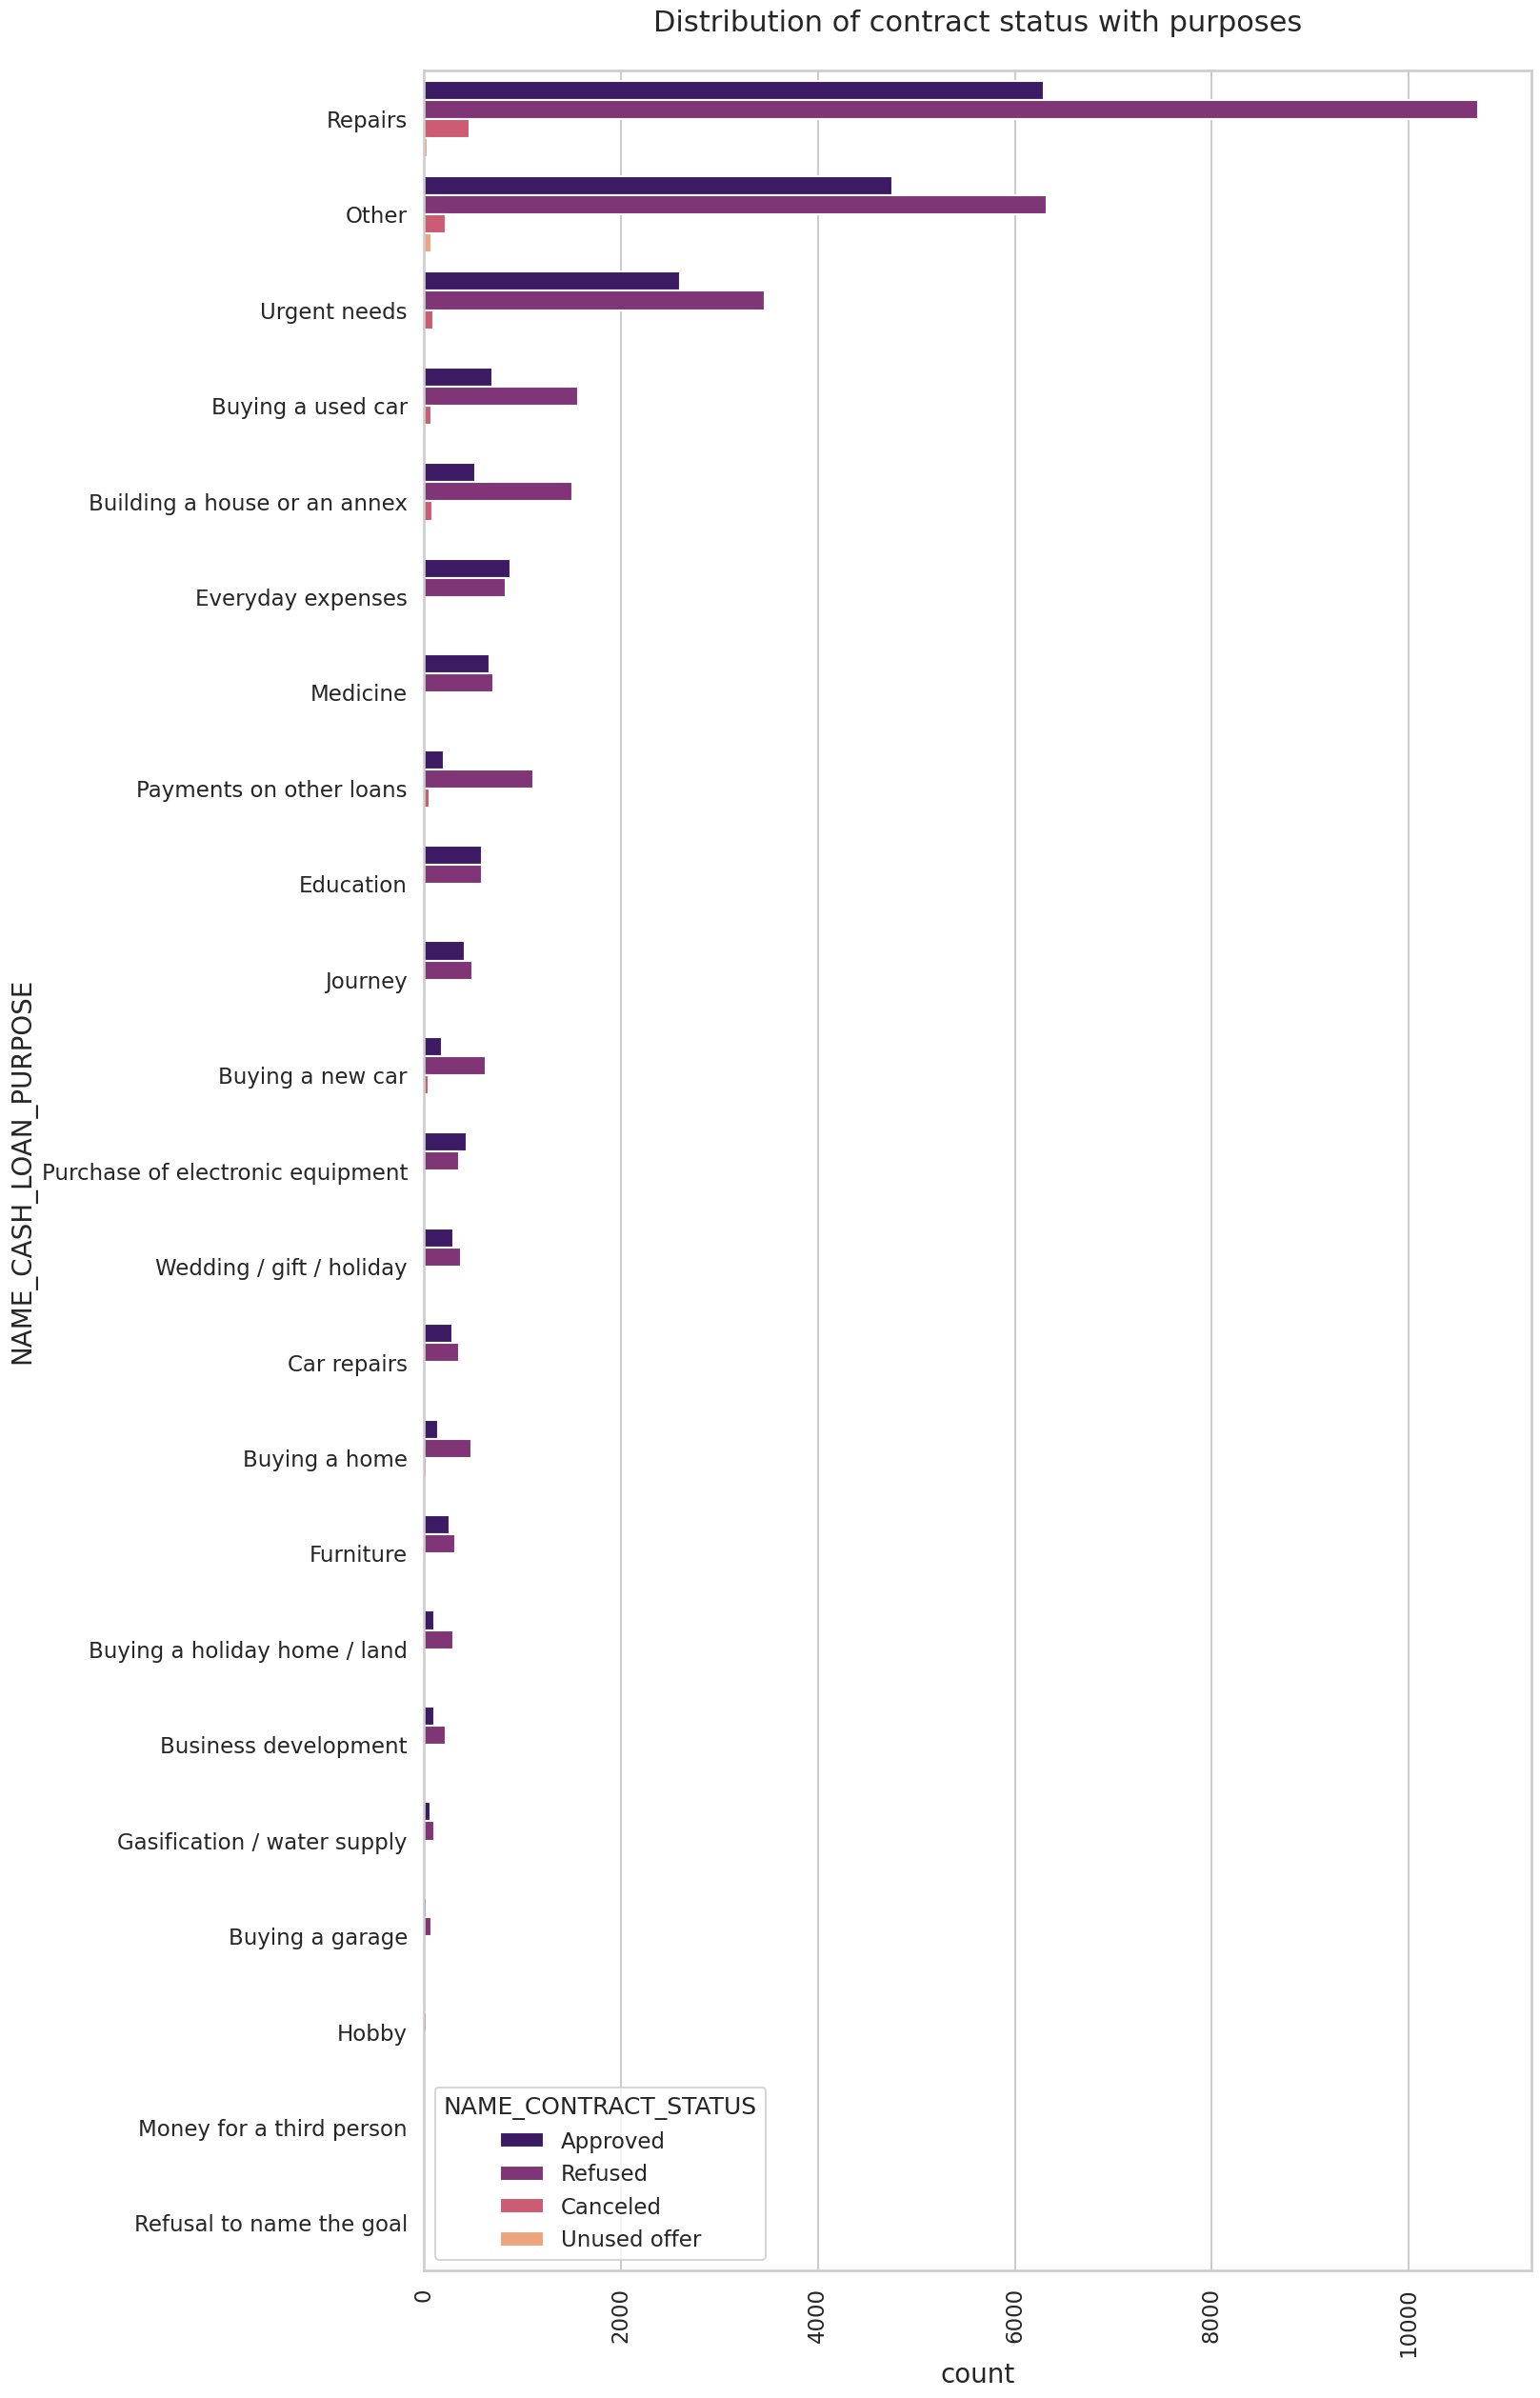

In [ ]:
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.title('Distribution of contract status with purposes')

ax = sns.countplot(
    data=new_df,
    y='NAME_CASH_LOAN_PURPOSE',
    order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
    hue='NAME_CONTRACT_STATUS',
    palette='magma'
)



Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.
For education purposes we have equal number of approves and rejection
Payign other loans and buying a new car is having significant higher rejection than approves.

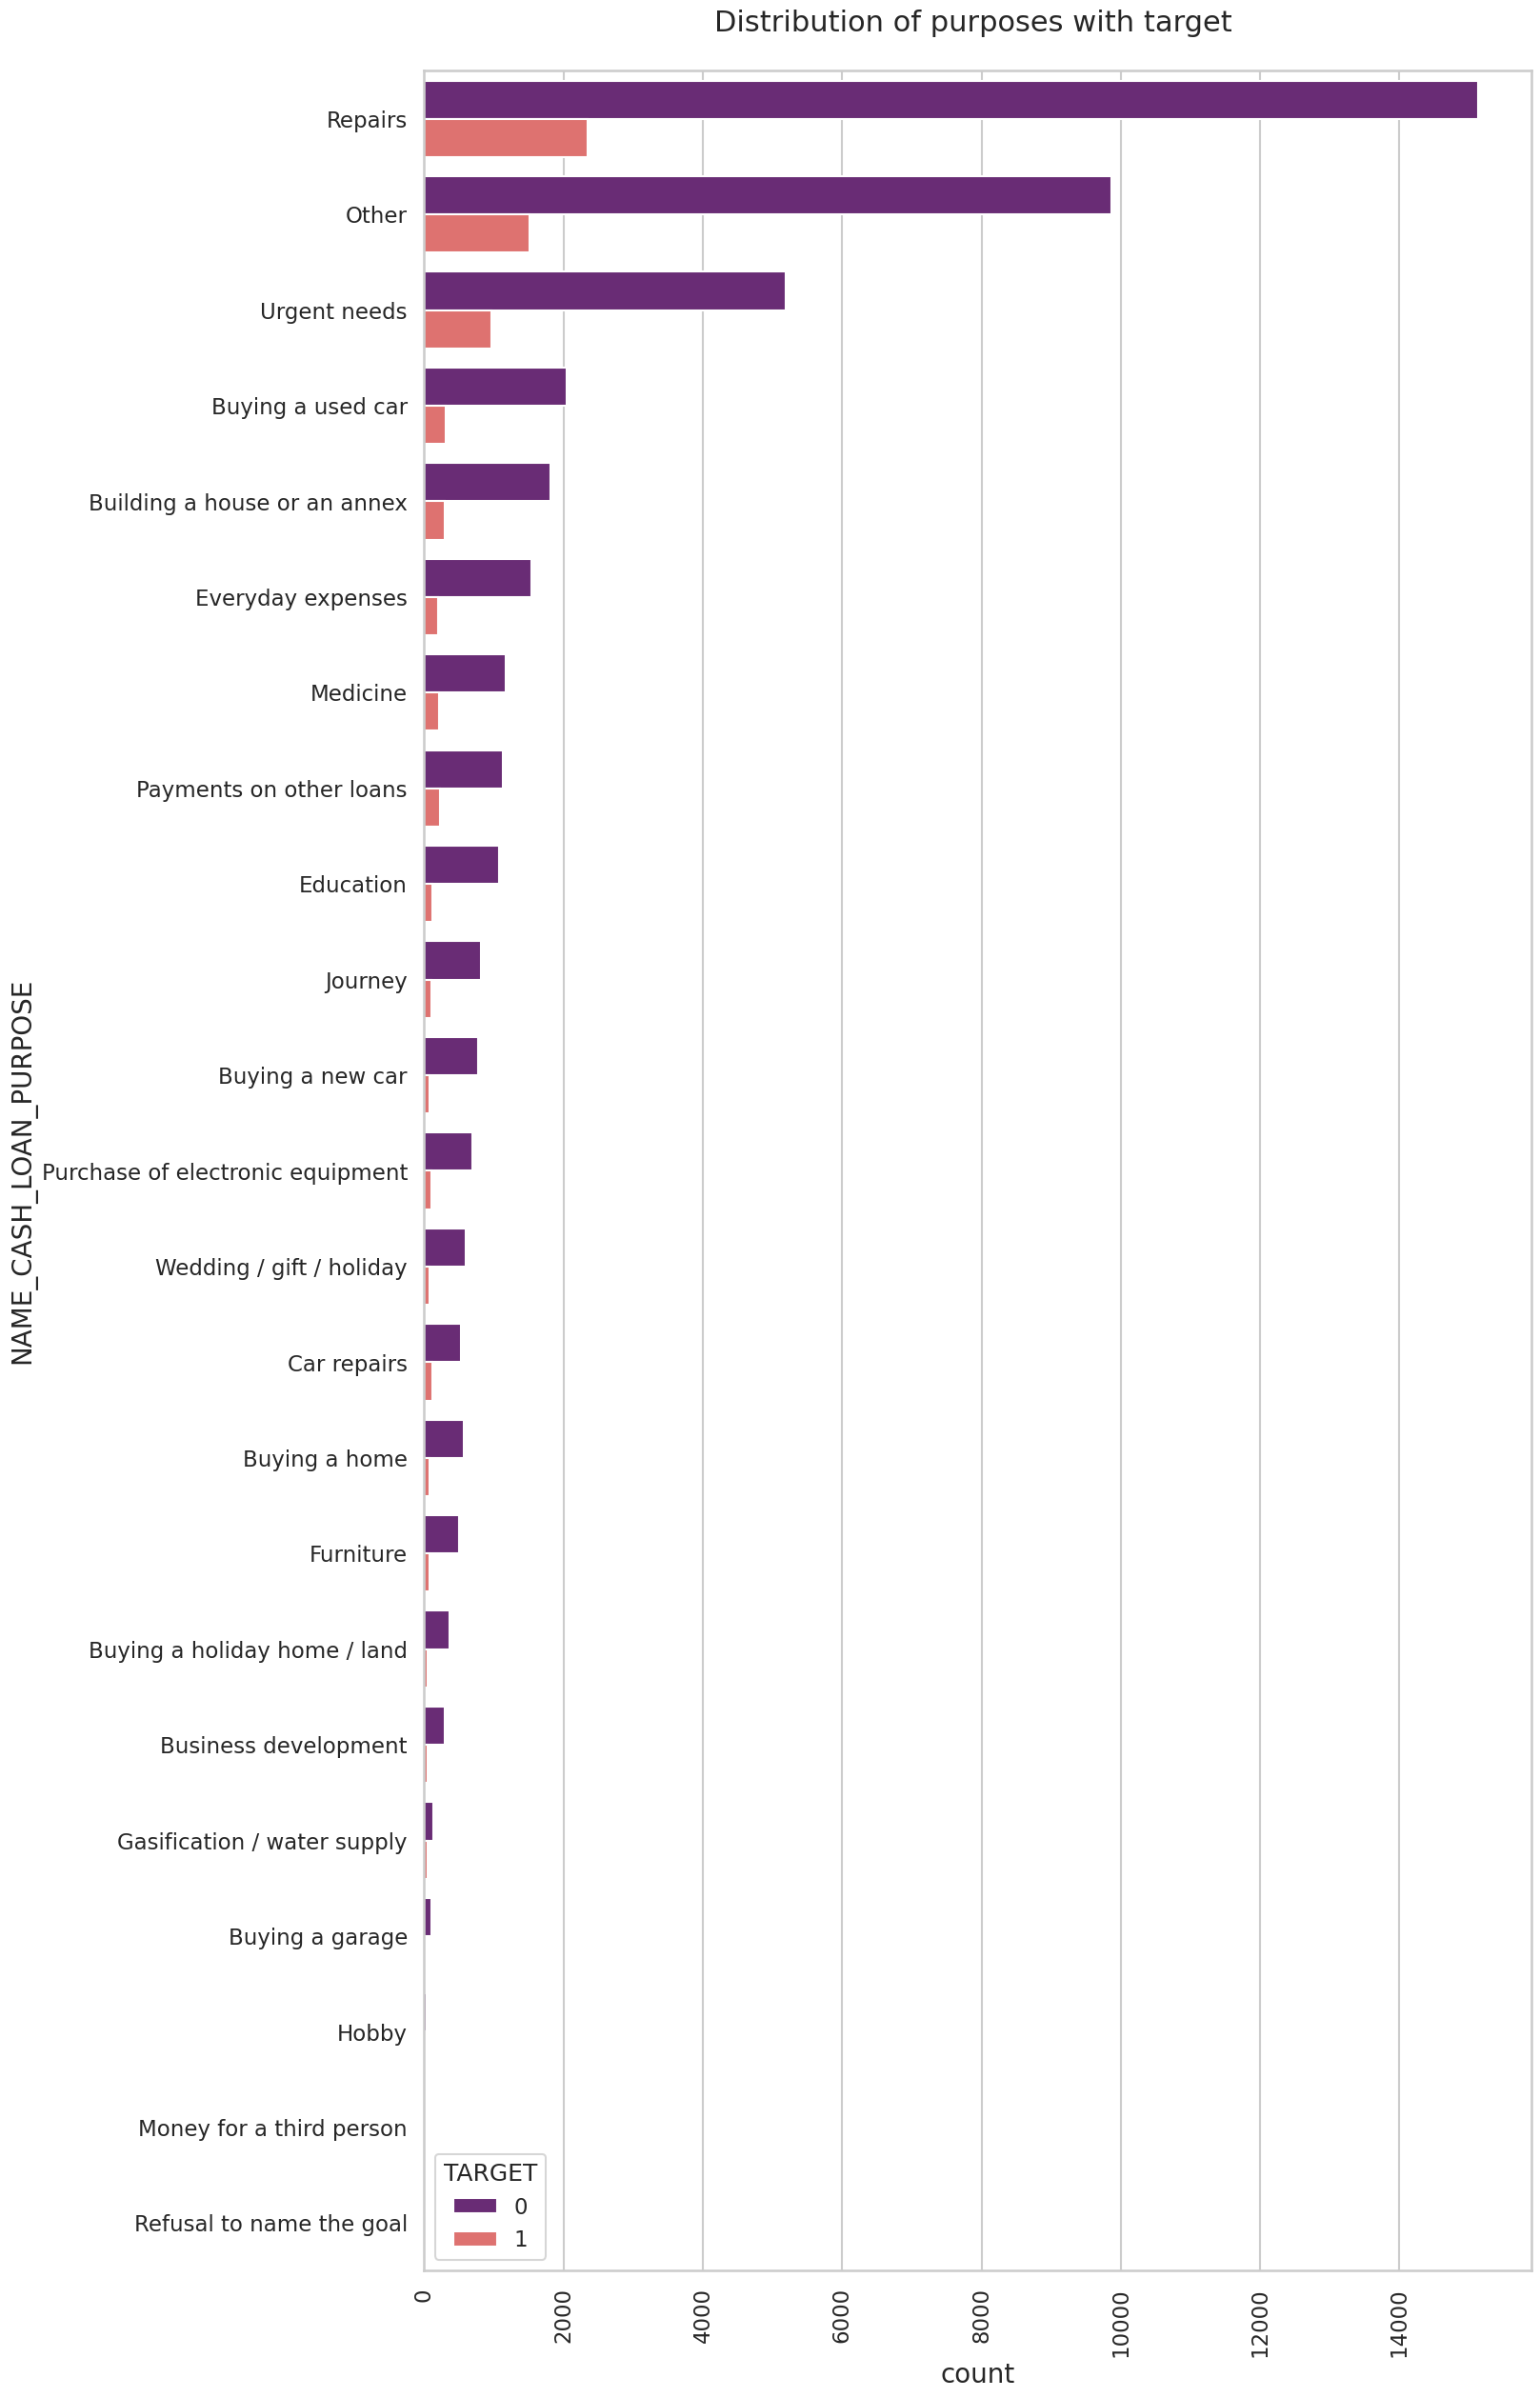

In [ ]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')


Few points we can conclude from abpve plot:

Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

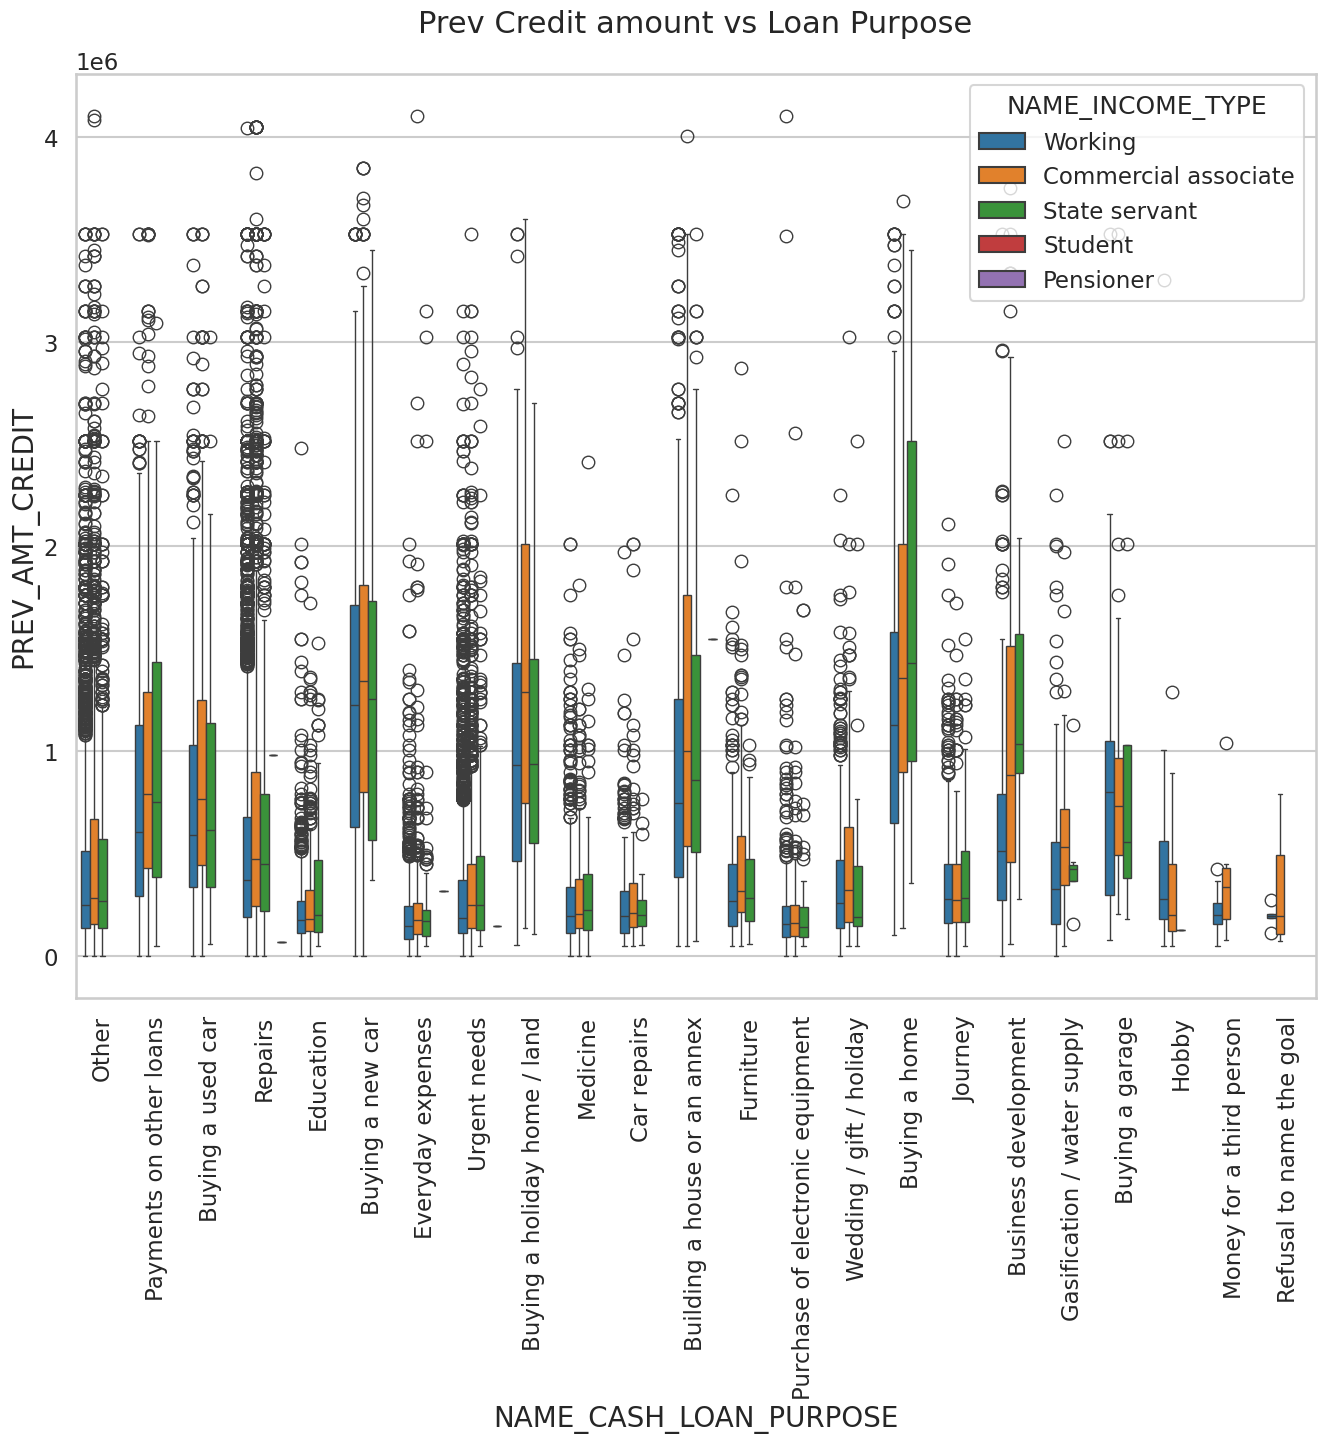

In [ ]:
# Box plotting for Credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='PREV_AMT_CREDIT',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

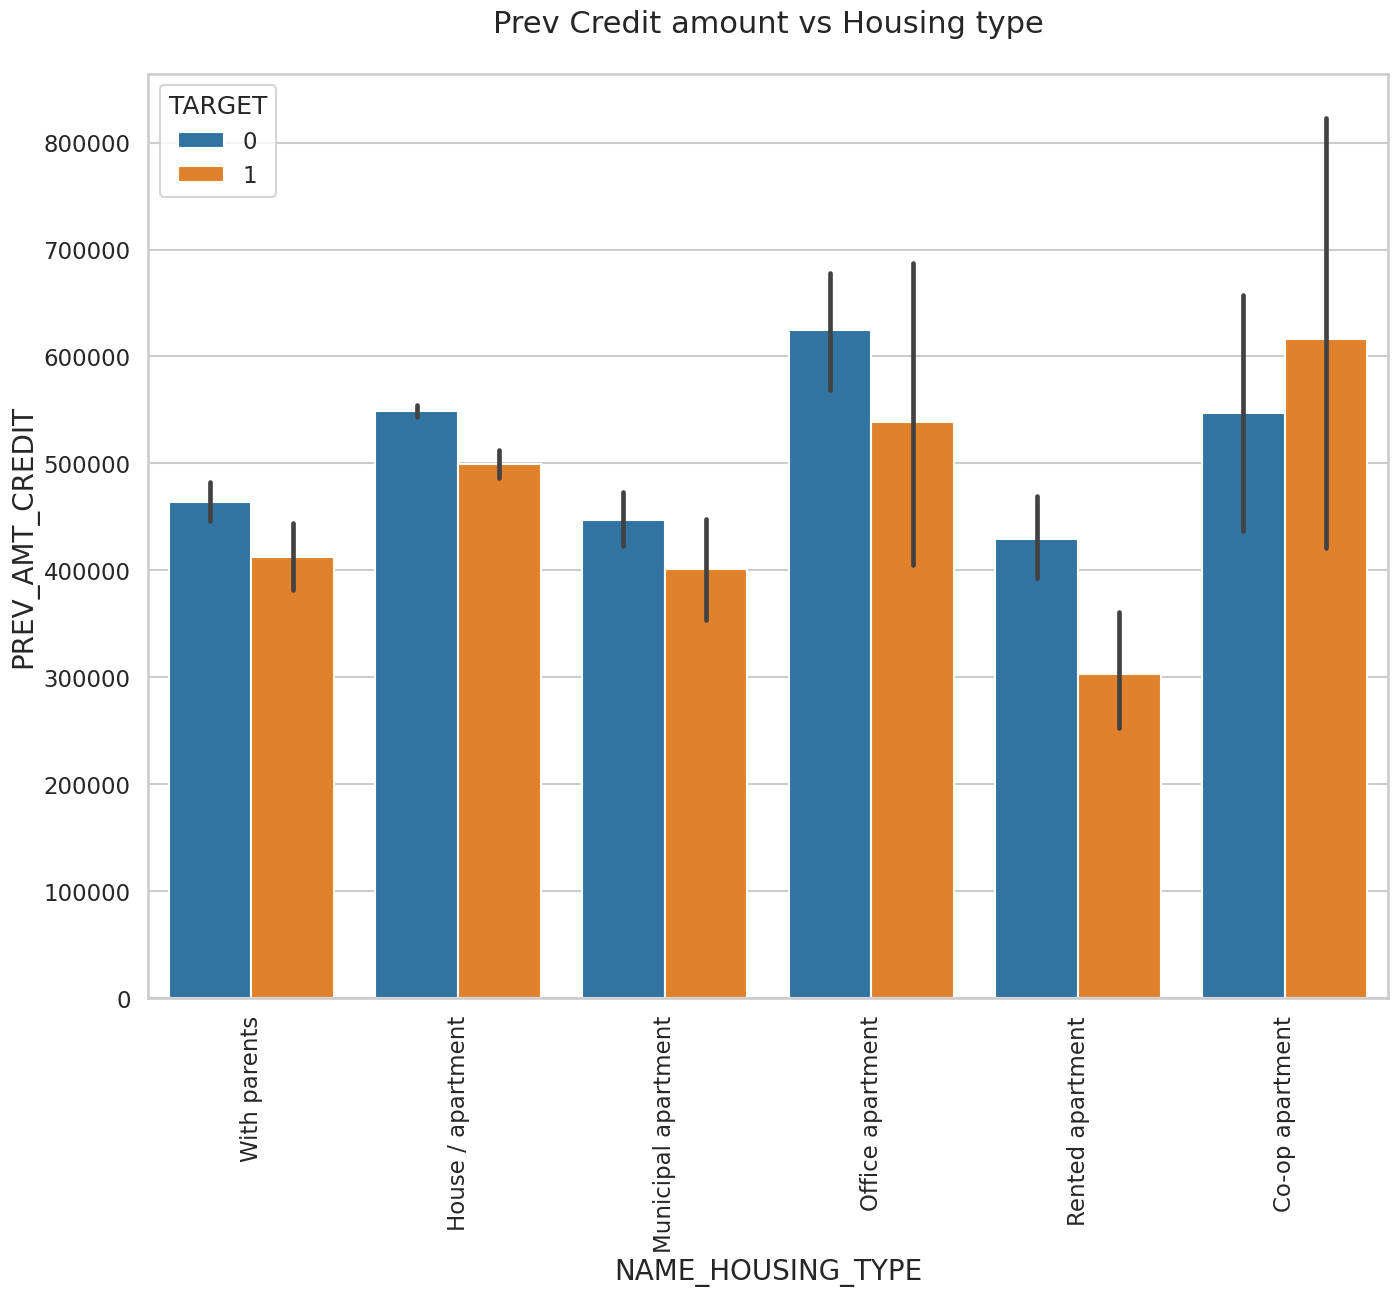

In [ ]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df, y='PREV_AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()


Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

**Hypothesis** **Testing**

In [ ]:
defaulters = applicants[applicants["TARGET"] == 1]
non_defaulters = applicants[applicants["TARGET"] == 0]

●	Do defaulters have significantly lower income than non-defaulters?

In [ ]:
#Ho=Defaulters have lower income than non-defaulters
#ssw.ttest_ind(pune,mumbai,value=0,alternative='two-sided')
ssw.ttest_ind(defaulters["AMT_INCOME_TOTAL"],non_defaulters["AMT_INCOME_TOTAL"],alternative='two-sided')

(np.float64(-3.68153318640025),
 np.float64(0.0002318839257056199),
 np.float64(252135.0))

since the p-value is less than 0.05 we reject the Ho.
Hence we conclude defaulters have lower income than non-defaulters

●	Is the default rate different across genders?

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency

H₀: Default rate is same for both genders

H₁: Default rate is different for genders

In [ ]:
stats.chi2_contingency(pd.crosstab(applicants["CODE_GENDER"], applicants["TARGET"]))

Chi2ContingencyResult(statistic=np.float64(610.2133851481753), pvalue=np.float64(1.0053965792409611e-134), dof=1, expected_freq=array([[143569.16542197,  13611.83457803],
       [ 86732.83457803,   8223.16542197]]))

Here p-value is less than 0.05 so we  reject the null hypothesis.
Hence default rate is different for genders.

H₀: Education level and default are independent

H₁: Education level and default are associated

In [ ]:
stats.chi2_contingency(pd.crosstab(applicants["NAME_EDUCATION_TYPE"], applicants["TARGET"]))

Chi2ContingencyResult(statistic=np.float64(1212.7287213561754), pvalue=np.float64(2.771746062369266e-261), dof=4, expected_freq=array([[1.26049235e+02, 1.19507649e+01],
       [6.08954816e+04, 5.77351842e+03],
       [8.91204628e+03, 8.44953716e+02],
       [2.08894638e+03, 1.98053618e+02],
       [1.58279477e+05, 1.50065235e+04]]))

Here p-value is less than 0.05 so we reject the null hypothesis.
Therefore we can say that Education level and default are associated.

H₀: Company default rate = 10%

H₁: Company default rate > 10%

In [ ]:
default_count = applicants["TARGET"].sum()
total_count = len(applicants)

In [ ]:
industry_rate = 0.10

In [ ]:
proportions_ztest(
    count=default_count,
    nobs=total_count,
    value=industry_rate,
    alternative="larger"
)

(np.float64(-23.924477927350164), np.float64(1.0))

Since the p-value is greater than 0.05, we reject the null hypothesis.
Therefore default rate is more than 10%


**CONCLUSION**
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.